### Importing the necessary libraries

In [1]:
!pip install graphviz

In [4]:
#pip install --upgrade seaborn matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, make_scorer, recall_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

I used nbmerge to combine all of my notebooks into one, so that means that I quickly reengineer the data in each section. (I have a section that goes in depth but each section contains a block with the same eengineered data after I reload the datasets.)  The reason I left the notebook like this is because I wanted to maintain the integrity of my outputs. This is to maintain accuracy of explanations within the notebook.    

# 1. Data Exploration
* This section will explore the data and include visualizations to help us better understand the dataset

## Loading the Datasets
* This section will load all of the dataframes into the jupyter notebook and allow us to look at it deeper for analysis.  i will show the head of each dataframe along with the info so that we can see integers versus categorical variables.  This will also show what columns contain missing values

### Loading the TheGeneral dataset

In [2]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)
df_TheGeneral.head()

AbilitecContactID  PolicyNumber  DriverNumber AbilitecHouseholdID  \
0  04ZJUS02EXPR09CB  Q080MDE1MTY2             1    04ZJUS0300X496LW   
1  04ZJUS0146KL4TTS  Q080MDEwOTEx             1    04ZJUS035SBF0GJ4   
2  04ZJUS02K2KC7DMW  Q080MDExOTIz             1    04ZJUS035ZXBZEH1   
3  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
4  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   

   DriverCount  ClaimCount  TotalPaid   ClaimNumber AtFaultDescription  \
0            4           1    5086.61  PA0002364104           No fault   
1            2           1       0.00  PA0002351705   Insured at fault   
2            2           1   21397.74  PA0002344011   Insured at fault   
3            5           3       0.00  PA0002348918           No fault   
4            5           3       0.00  PA0002348997           No fault   

  ClaimStatus                 ClaimType           DateOfLoss  DriverID  \
0           C                      HAIL  2018-08-06 00:00:00        98   
1           C            PG_IVREARENDCV  2018-05-24 00:00:00         1   
2           C  PG_COLLISIONINTERSECTION  2018-06-17 00:00:00         1   
3           C                      HAIL  2018-06-19 00:00:00        98   
4           C             GLASSBREAKAGE  2018-06-30 00:00:00         1   

  LossState PolicyStateCode SubrogrationFlag    TermEffectiveDate  VehicleID  \
0        CO              CO               NO  2018-05-29 00:00:00          1   
1        CO              CO               NO  2018-05-24 00:00:00          1   
2        CO              CO               NO  2018-05-25 00:00:00          1   
3        CO              CO              YES  2018-06-01 00:00:00          2   
4        CO              CO               NO  2018-06-01 00:00:00          2   

   ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  DaysToClaim_h  
0              9.0             5086.61          0.0            0.0  
1              4.0                0.00          0.0            0.0  
2             53.0            21397.74          0.0            0.0  
3             14.0                0.00          0.0            0.0  
4              1.0                0.00          0.0            0.0

In [3]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

### Loading the MasterQuote dataset

In [4]:
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)
df_MasterQuote.head()

QuoteNumber  MQuotedTotalPayment BiFcCoverageInd CoverageTypeDescription  \
0  MzM0MDA0OTE=               1136.0         BI NOFC          Liability Only   
1  MzM0MDQxNzU=                  0.0       NOBI NOFC          Liability Only   
2  MzM0MTc2MTk=               1160.0         BI NOFC          Liability Only   
3  MzM0MTk3MjQ=               3054.0           BI FC           Full Coverage   
4  MzM0MjAxMjU=                  0.0       NOBI NOFC          Liability Only   

   DriversActive GaragingState NamedInsuredMaritalStatus  PolicyNumber  \
0              1            OR                    Single  T1IyNzE0OTQ0   
1              1            IL                  Divorced           NaN   
2              2            NV                   Married  TlYyNzE2MTE5   
3              2            RI                   Married  UkkyNzQ3ODg1   
4              1            OH                    Single           NaN   

  PolicyStateCode  PolicyTerm   QuoteInitiatedTime    TermEffectiveDate  \
0              OR          12  2016-01-02 22:25:47  2016-01-02 00:00:00   
1              IL          12  2016-01-03 12:15:55  2016-01-03 00:00:00   
2              NV          12  2016-01-04 11:10:58  2016-01-04 00:00:00   
3              RI          12  2016-01-04 12:09:06  2016-01-26 00:00:00   
4              OH          12  2016-01-04 12:20:07  2016-01-04 00:00:00   

    TermExpirationDate AbilitecContactID  DriverNumber AbilitecHouseholdID  \
0  2017-01-02 00:00:00  04ZJUS0220X4MKG7             1    04ZJUS033FV1YJP0   
1  2017-01-03 00:00:00  04ZJUS02W4N0B2J5             1    04ZJUS03543132P3   
2  2017-01-04 00:00:00  04ZJUS01KNTMYEQF             1    04ZJUS03X6MXZ21T   
3  2017-01-26 00:00:00  04ZJUS02XQ1DGSDW             2    04ZJUS03ZDK4PGRF   
4  2017-01-04 00:00:00  04ZJUS023RYMYKKP             1    04ZJUS036201CX3G   

   DriverCount  
0            1  
1            1  
2            2  
3            1  
4            1

In [5]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

### Brief Summary
* The general dataframe has quite a few columns with missing values, this needs to be fixed
* The masterquote dataframe has 1 column with missing values.  This is not super detrimental and can be easily fixed. I will probably delete this column because it does not have much affect on the dataframe as a whole.

## Visualizing Missing Values
* This section will focus on visulaizing the missing values in each dataset. By using a missing value matrix we can see which columns have missing values versus those who don't.  The visualization makes it much easier to assess what columns need to be engiineered

### The General Dataframe

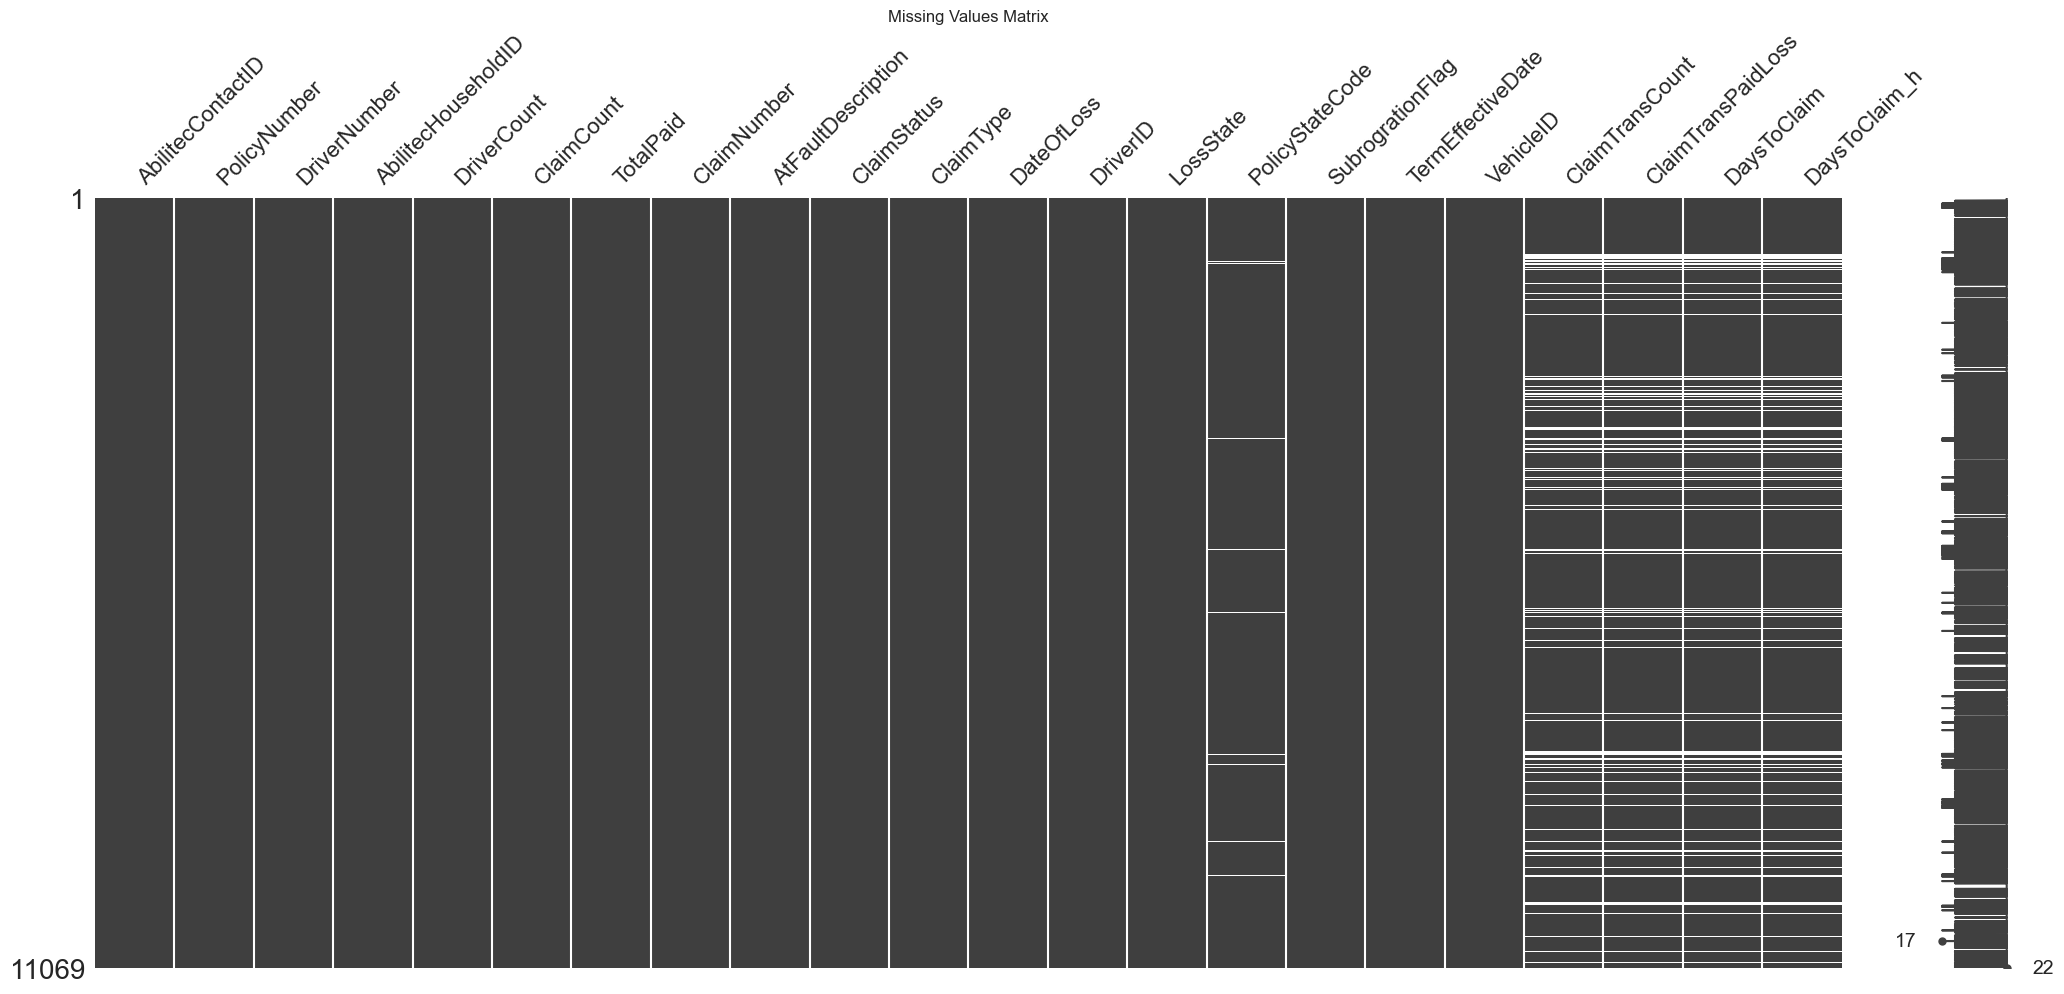

In [8]:
#Visualize missing value matrix for general dataframe
msno.matrix(df_TheGeneral)
plt.title("Missing Values Matrix")
plt.show()

### MasterQuote Dataframe

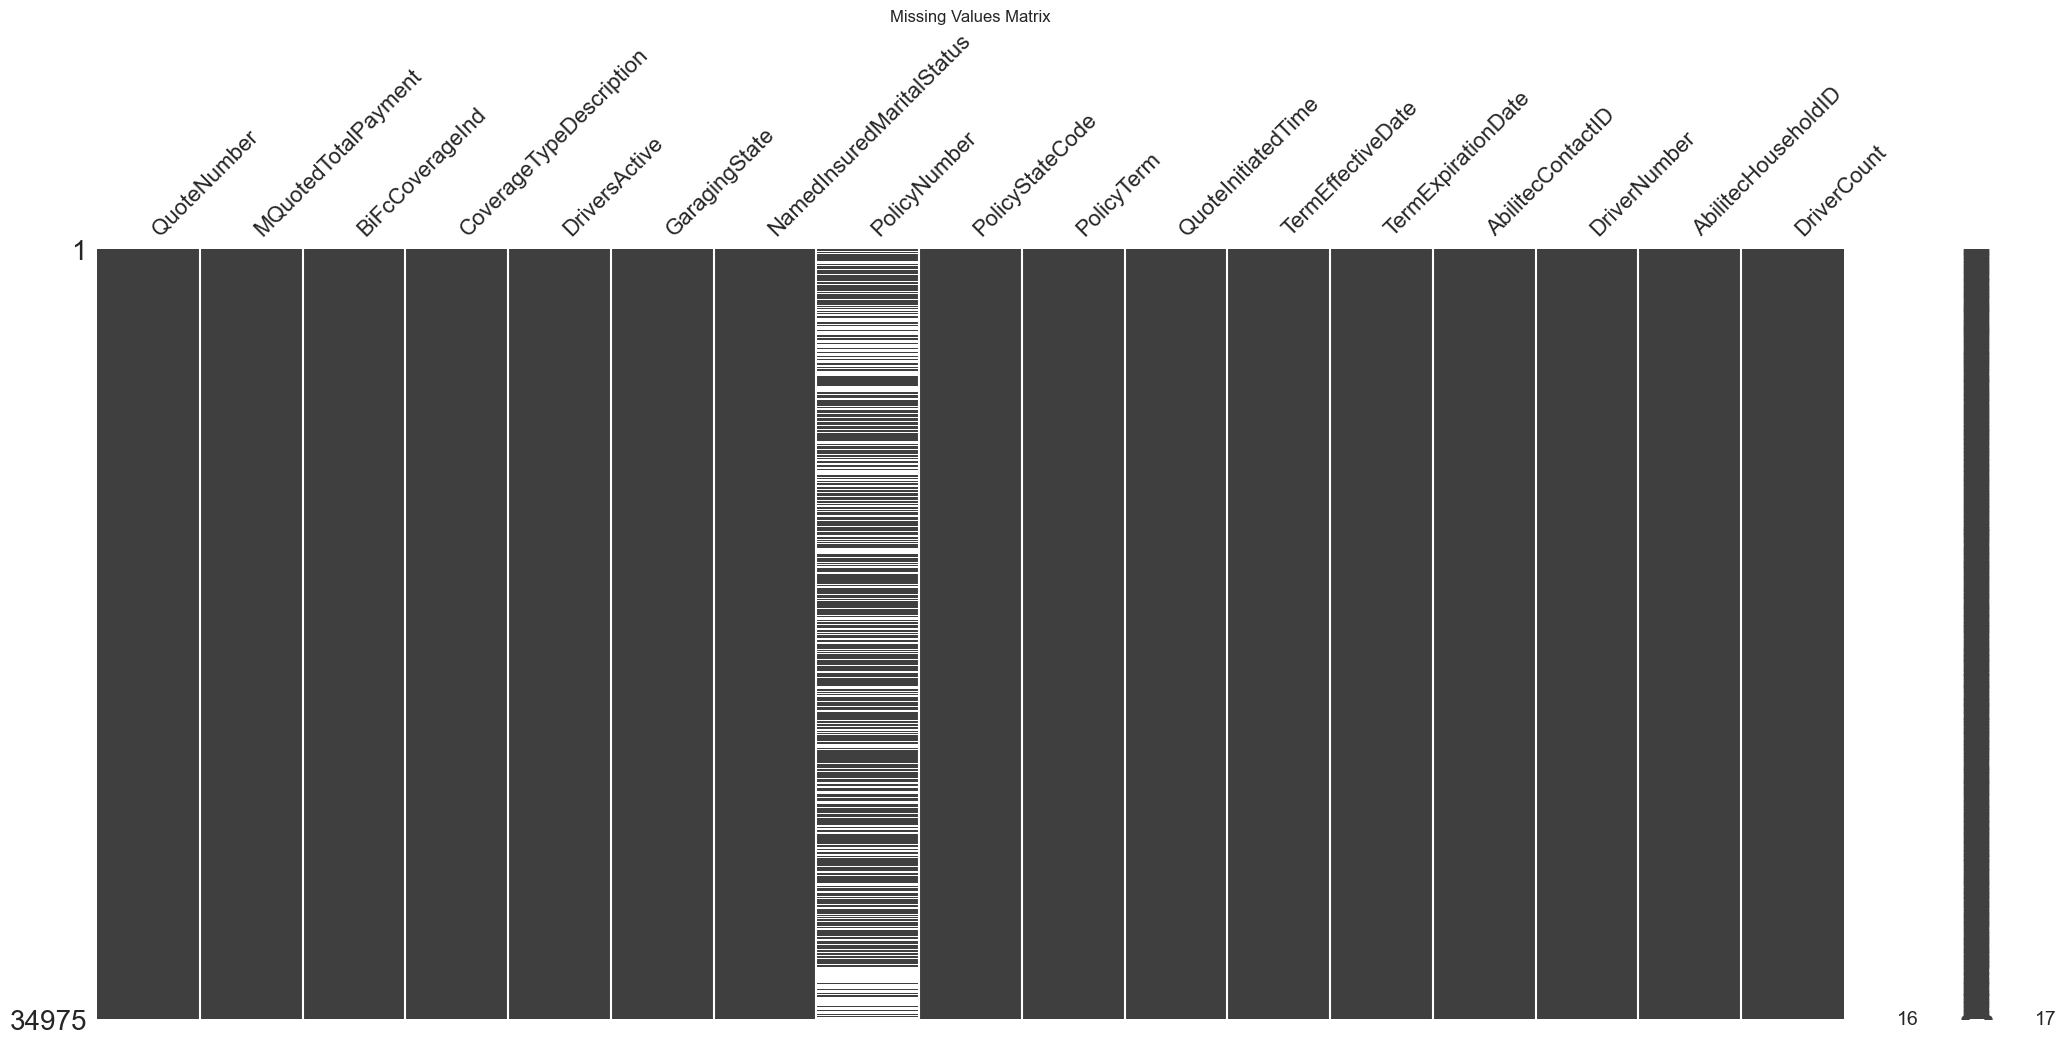

In [9]:
#visualize missing value matrix for masterquote dataframe
msno.matrix(df_MasterQuote)
plt.title("Missing Values Matrix")
plt.show()

### Brief Summary
* General Dataframe
    * The same rows are missing values from the columns with missing values
    * These rows could be coul dbe looked at to be deleted if 20% of their contents are nan values
    
* MasterQuote Dataframe
    * The only column that is missing values is policy number which would have little to no significance in predicting the Quoted Total Payment

## Descriptive Statistics
* This section will show all descriptive statistics (count, mean, std, min, max, 25%, 50%, 75%) of all numerical variables and statistics such as count, unique, top and most frequent for the categorical variables

### The General Dataframe

This cell will show the numerical feature summary

In [11]:
##Feature summary for numerical features in the general dataframe
print("Numerical Feature Summary:")
df_TheGeneral.describe()

Numerical Feature Summary:


DriverNumber   DriverCount    ClaimCount      TotalPaid      DriverID  \
count  11069.000000  11069.000000  11069.000000   11069.000000  11069.000000   
mean       1.041286      2.792032      1.940826    7706.163453     19.411239   
std        0.282314      2.440237      1.398869   14093.710283     37.955300   
min        1.000000      1.000000      1.000000       0.000000      0.000000   
25%        1.000000      1.000000      1.000000       0.000000      1.000000   
50%        1.000000      2.000000      1.000000    2304.350000      1.000000   
75%        1.000000      4.000000      2.000000    8754.270000      2.000000   
max        6.000000     34.000000     13.000000  130141.300000     99.000000   

          VehicleID  ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  \
count  11069.000000      9780.000000         9780.000000  9780.000000   
mean       3.287921        11.362372         4270.032683     1.554839   
std       34.400114        12.076882         8629.654146    19.932623   
min        0.000000         1.000000            0.000000   -25.000000   
25%        1.000000         4.000000            0.000000     0.000000   
50%        1.000000         8.000000         1162.785000     0.000000   
75%        2.000000        14.000000         4419.840000     0.000000   
max      998.000000       285.000000       113840.050000   762.000000   

       DaysToClaim_h  
count    9780.000000  
mean       37.316131  
std       478.382959  
min      -600.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max     18288.000000

This cell will show the categorical feature summary

In [12]:
#feature summary for categorical features in general dataframe
print("Categorical Feature Summary:")
df_TheGeneral.select_dtypes(include='object').describe()

Categorical Feature Summary:


AbilitecContactID  PolicyNumber AbilitecHouseholdID   ClaimNumber  \
count              11069         11069               11069         11069   
unique              7349          7836                7505         11069   
top     04ZJUS02EZD0MD68  VkEzMTgwNzgw    04ZJUS03GKGDGL1K  PA0002364104   
freq                  13            13                  13             1   

       AtFaultDescription ClaimStatus       ClaimType           DateOfLoss  \
count               11069       11069           11069                11069   
unique                  5           2              58                 2644   
top      Insured at fault           C  PG_IVREARENDCV  2018-12-07 00:00:00   
freq                 4976       10870            1423                   32   

       LossState PolicyStateCode SubrogrationFlag    TermEffectiveDate  
count      11069           10948            11069                11069  
unique        54              47                2                 2171  
top           OH              OH               NO  2078-12-31 00:00:00  
freq         860             855             9928                  225

### MasterQuote Dataframe

This cell will show numerical features summary

In [13]:
##Feature summary for numerical features in the masterquote dataframe
print("Numerical Feature Summary:")
df_MasterQuote.describe()

Numerical Feature Summary:


MQuotedTotalPayment  DriversActive    PolicyTerm  DriverNumber  \
count         34975.000000   34975.000000  34975.000000  34975.000000   
mean           1554.266786       1.300758      9.799514      1.042831   
std            1232.290357       0.552171      2.891542      0.243509   
min               0.000000       1.000000      6.000000      1.000000   
25%             789.875000       1.000000      6.000000      1.000000   
50%            1260.000000       1.000000     12.000000      1.000000   
75%            2015.920000       2.000000     12.000000      1.000000   
max           18803.000000       6.000000     12.000000      6.000000   

        DriverCount  
count  34975.000000  
mean       1.747219  
std        1.214019  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       15.000000

This cell will show categorical feature summary

In [14]:
#feature summary for categorical features in masterquote dataframe
print("Categorical Feature Summary:")
df_MasterQuote.select_dtypes(include='object').describe()

Categorical Feature Summary:


QuoteNumber BiFcCoverageInd CoverageTypeDescription GaragingState  \
count          34975           34975                   34975         34975   
unique         34975               4                       3            47   
top     MzM0MDA0OTE=         BI NOFC          Liability Only            OH   
freq               1           18580                   21016          2525   

       NamedInsuredMaritalStatus  PolicyNumber PolicyStateCode  \
count                      34975         21113           34975   
unique                         7         21113              47   
top                       Single  T1IyNzE0OTQ0              OH   
freq                       20366             1            2525   

         QuoteInitiatedTime    TermEffectiveDate   TermExpirationDate  \
count                 34975                34975                34975   
unique                34437                 1230                 1381   
top     2019-03-18 23:19:11  2018-11-30 00:00:00  2019-11-30 00:00:00   
freq                      5                  235                  182   

       AbilitecContactID AbilitecHouseholdID  
count              34975               34975  
unique             21119               22449  
top     04ZJUS02NRX4JFSS    04ZJUS0343VBYQQN  
freq                  23                  23

### Brief Summary
* We can see that the average Quoted Total Payment was 1554.266786.  We can also see that the average drivers active is around 1.
* In the general dataframe, we can see that the average total amount paid was 7706.163453.  

* By looking at the descriptive statistics, we can get a good idea of values to expect for each column in each dataset.  This will come in handy later when assessing values that a model may output.  If the values are similar to the descriptive statistics for that dataframe then the model is in the right direction

## Correlation Analysis
* This will make a heatmap and show possible correlation between numerical features.  This could help us analyze features that are important to the dataframe

This cell will show the heatmap for the general df

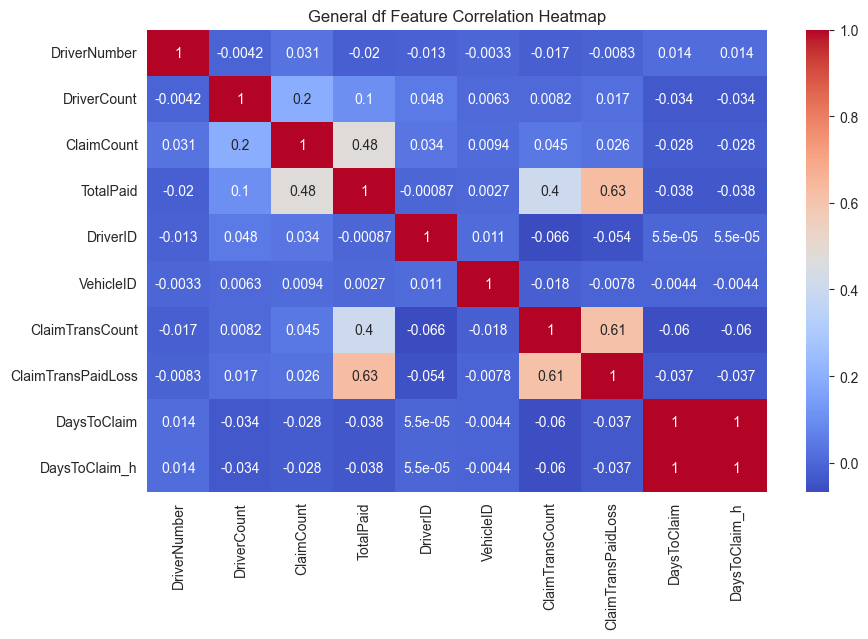

In [17]:
#This will show a correlation analysis and heatmap for the general dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_TheGeneral.corr(), annot=True, cmap='coolwarm')
plt.title("General df Feature Correlation Heatmap")
plt.show()

This cell will show heatmap for master quote df

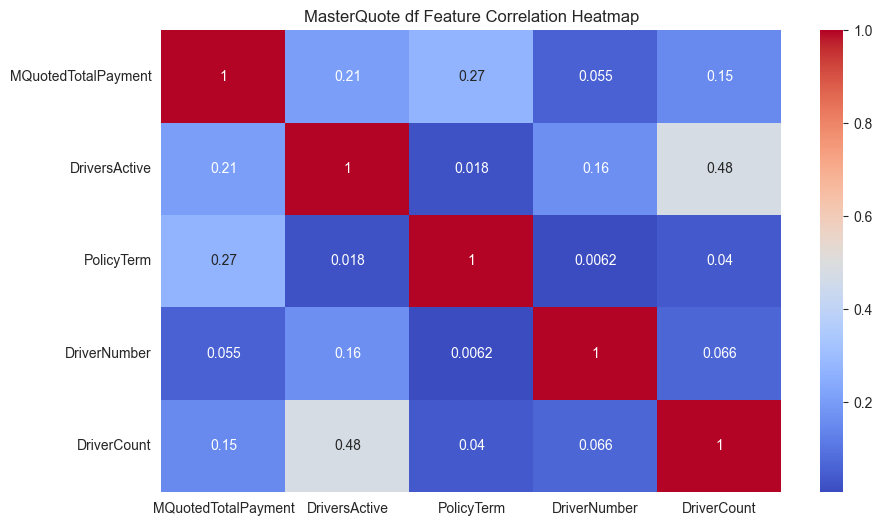

In [18]:
#This will show a heatmap for the Masterquote dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_MasterQuote.corr(), annot=True, cmap='coolwarm')
plt.title("MasterQuote df Feature Correlation Heatmap")
plt.show()

### Brief Summary
* These heatmaps show correlation between certain features.  There was little to no correlation between features for the MasterQuote.  I did see some correlation between claim trans count and claim trans paid loss in the general dataframe.

## Histogram for Numerical Values
* This will create histograms so that I can assess how each numerical column is skewed.  This will be important so I can assess how the data is skewed

This cell will show histograms for each numerical feature in the general df

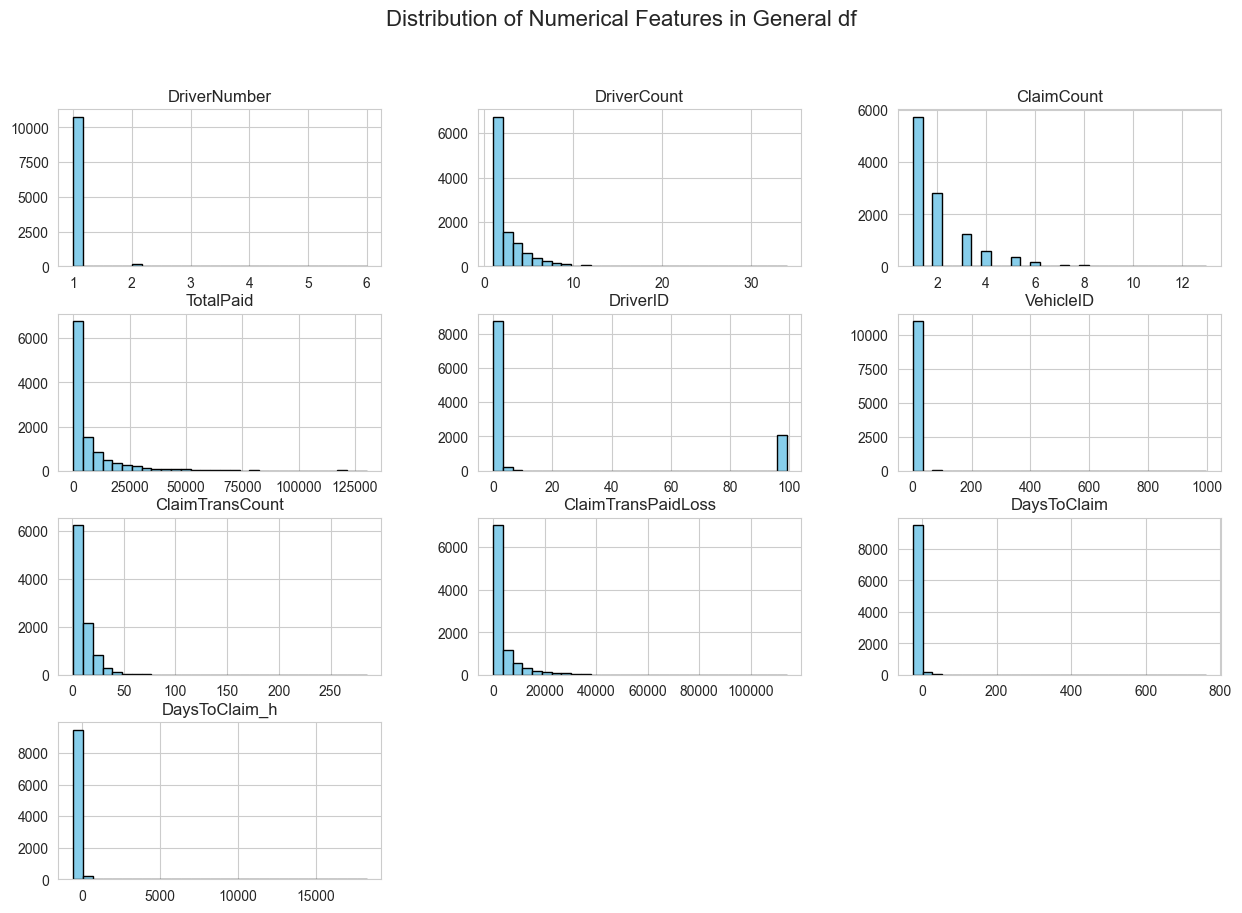

In [20]:
#Histogram for numerical columns in the general dataframe
numerical_columns = df_TheGeneral.select_dtypes(include=['float64', 'int64']).columns

df_TheGeneral[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features in General df', fontsize=16)
plt.show()

This cell will show histograms for each numerical feature in the masterquote df

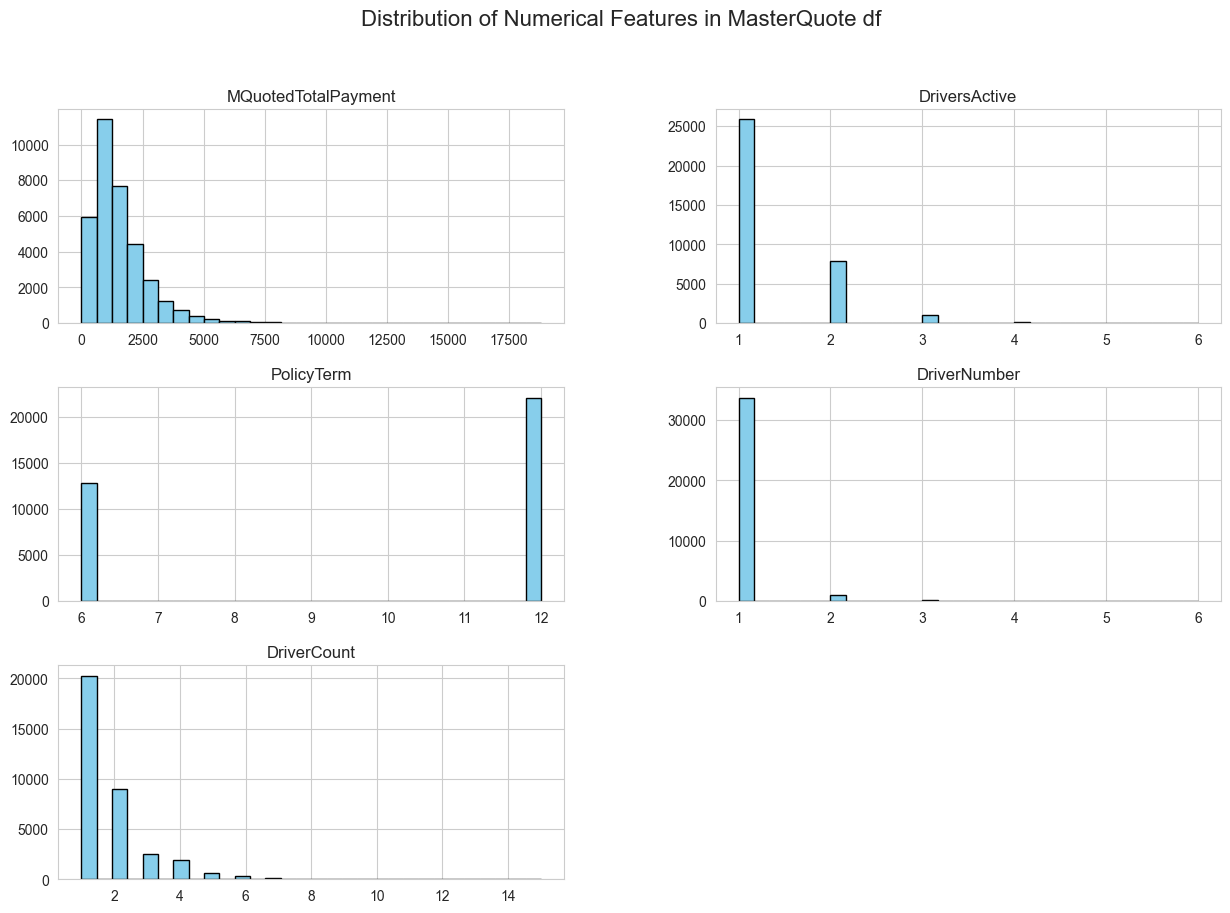

In [21]:
#histogram for numerical columns in the MasterQuote dataframe
numerical_columns = df_MasterQuote.select_dtypes(include=['float64', 'int64']).columns

df_MasterQuote[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features in MasterQuote df', fontsize=16)
plt.show()

### Brief Summary
* We can see that most of the plots for MasterQuote and The General show right skewed. this means that the amounts are lower.

## Boxplot to Assess Outliers
* A box plot will help me visualize outliers so I can see which numerical columns have the most outliers
* This will help me determine if the information previously gathered in the descriptive statistics section may be skewed

The general df boxplots

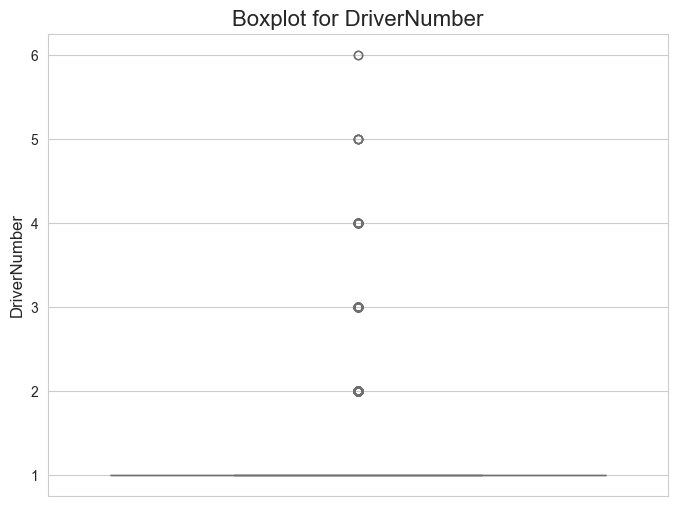

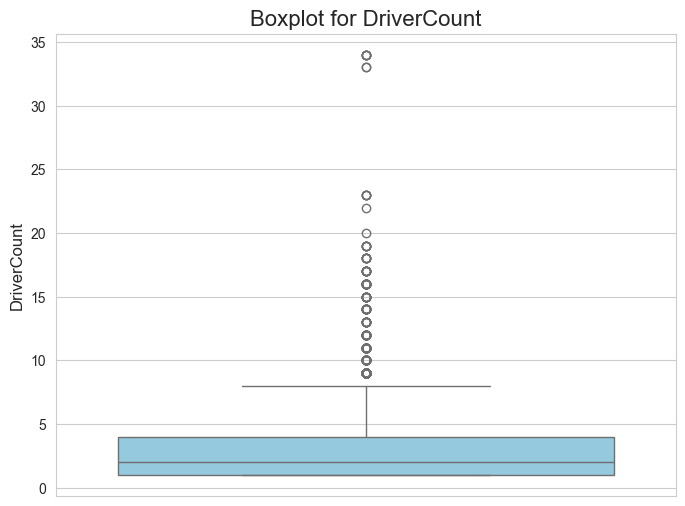

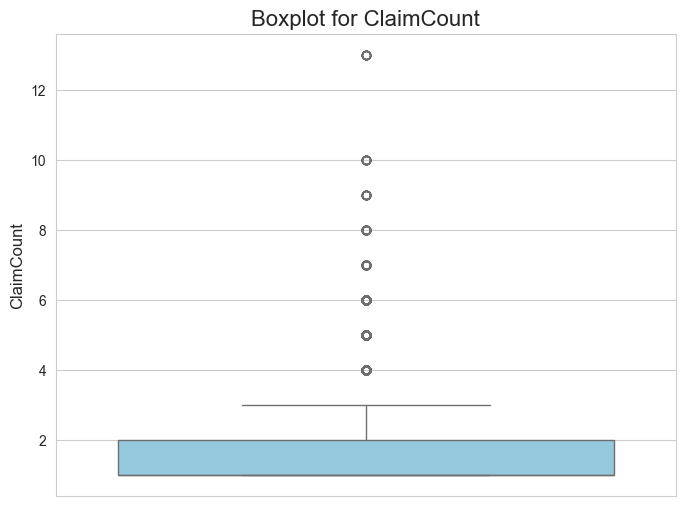

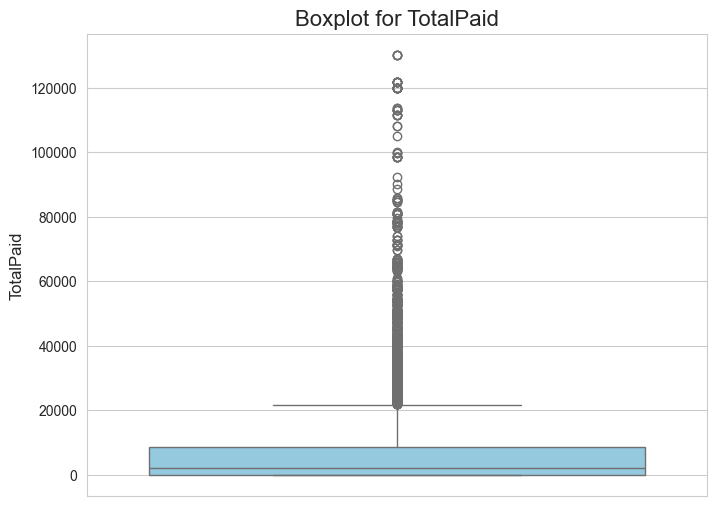

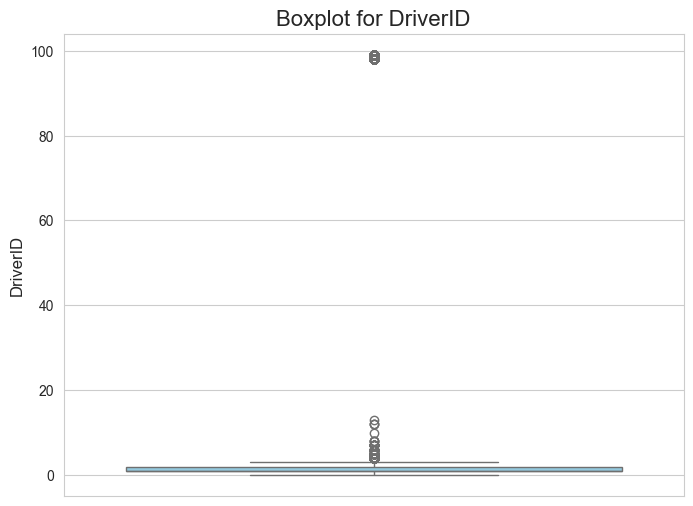

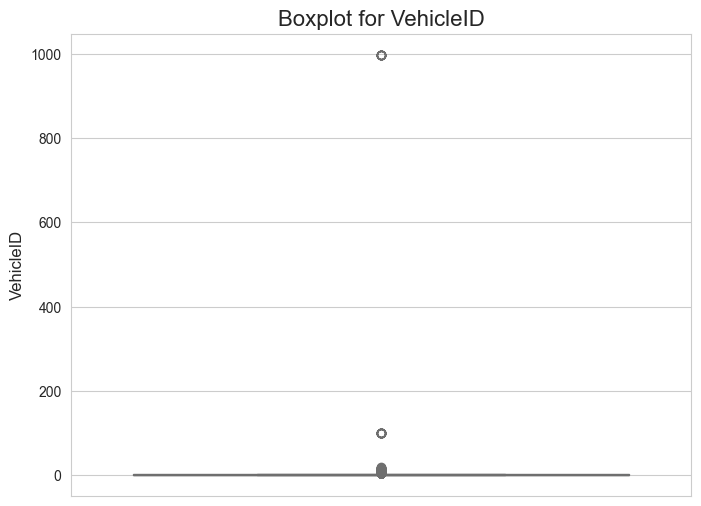

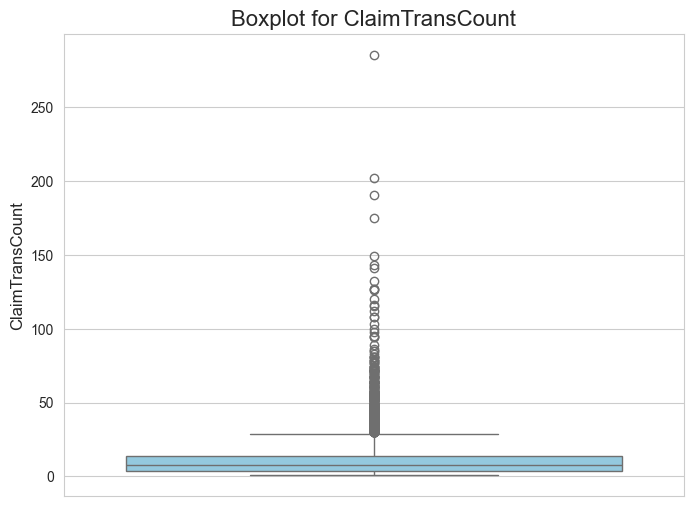

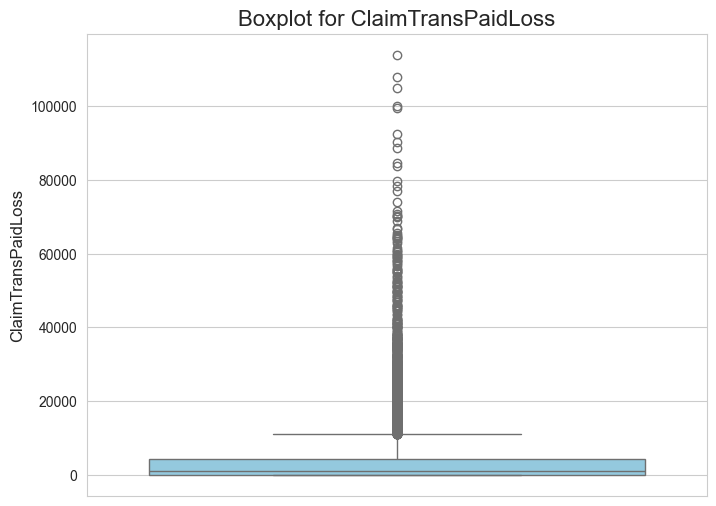

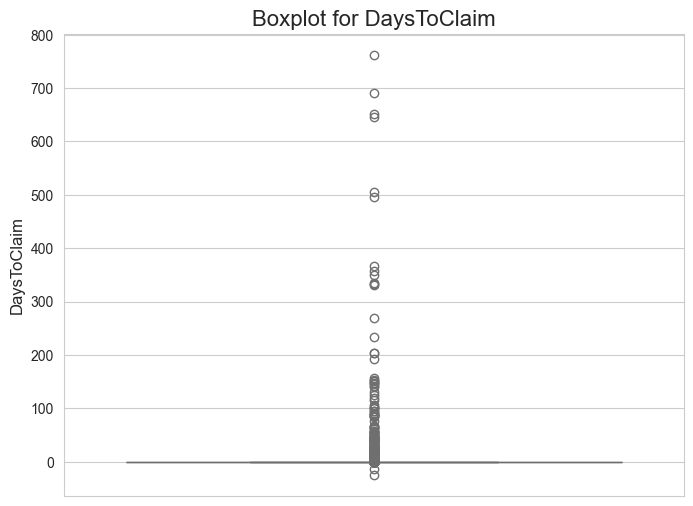

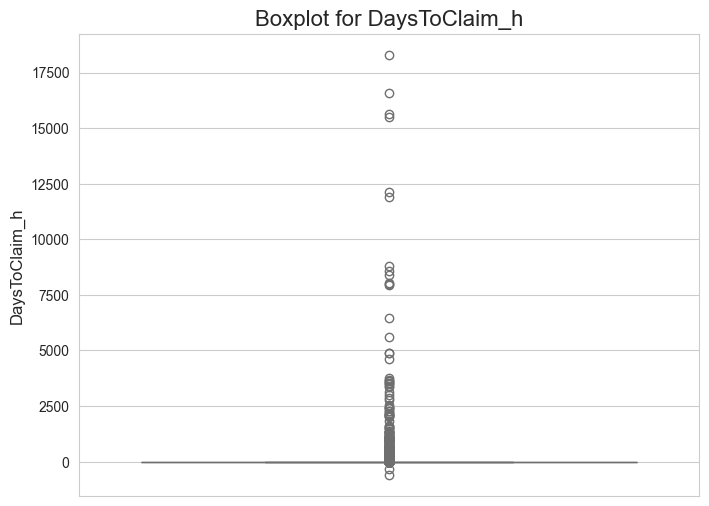

In [23]:
# Filter for numeric columns
numeric_columns = df_TheGeneral.select_dtypes(include=['number']).columns

# Iterate through each numeric column and create a box plot
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.boxplot(y=df_TheGeneral[column], color='skyblue')  # Boxplot for each column
    plt.title(f'Boxplot for {column}', fontsize=16)  # Add title
    plt.ylabel(column, fontsize=12)  # Label y-axis
    plt.show()

The masterquote df boxplots

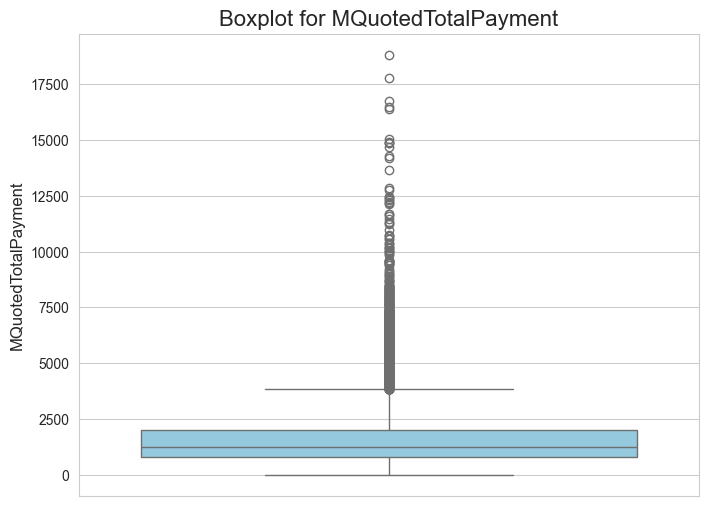

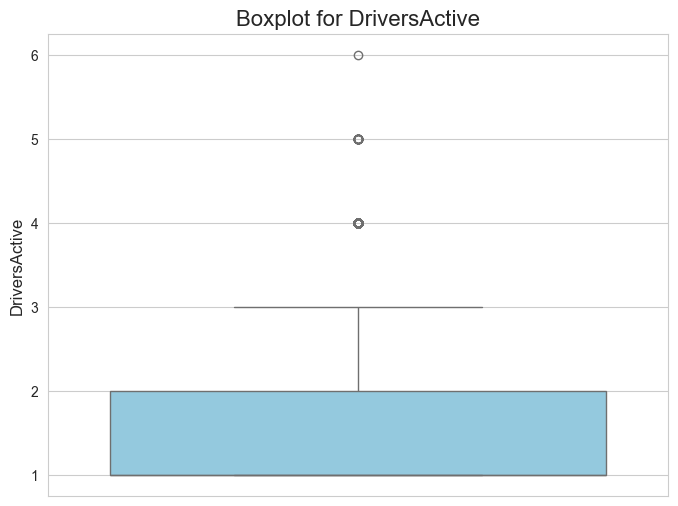

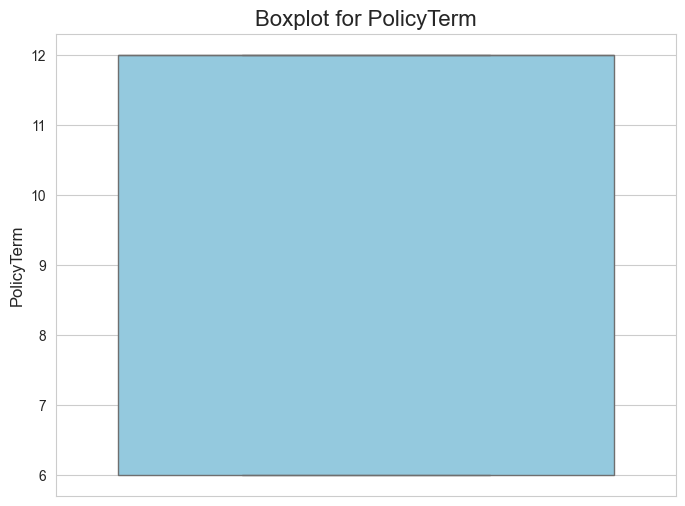

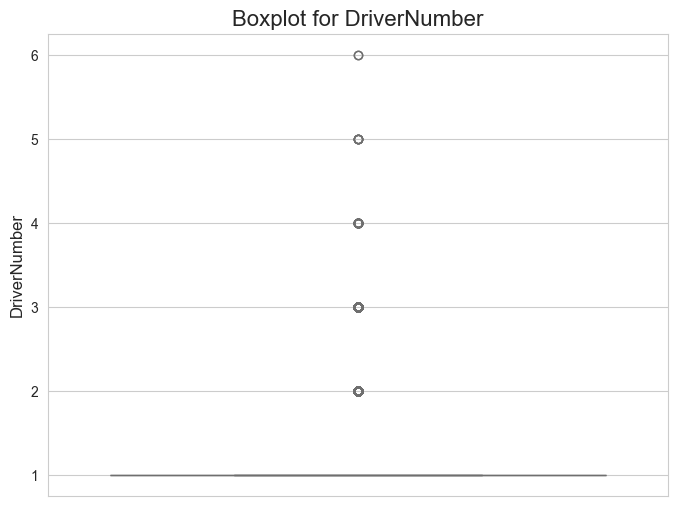

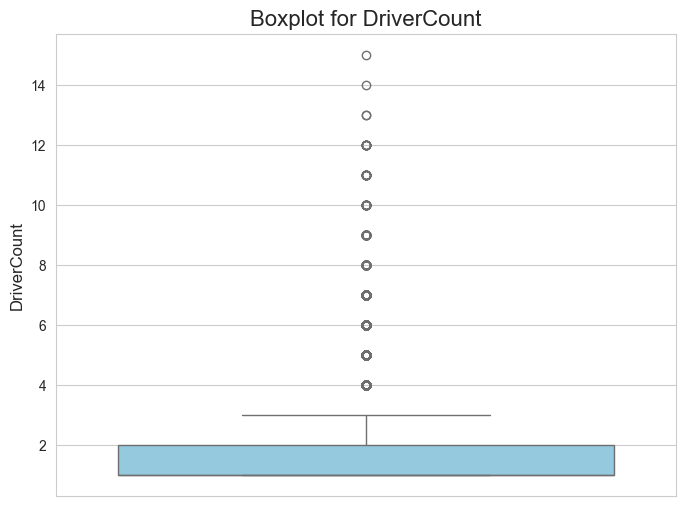

In [24]:
# Filter for numeric columns
numeric_columns = df_MasterQuote.select_dtypes(include=['number']).columns

# Iterate through each numeric column and create a box plot
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.boxplot(y=df_MasterQuote[column], color='skyblue')  # Boxplot for each column
    plt.title(f'Boxplot for {column}', fontsize=16)  # Add title
    plt.ylabel(column, fontsize=12)  # Label y-axis
    plt.show()

### Brief Summary
* In the general df, total paid, claim trans count, claim trans paid loss, and days to claim have. asignificant amount of outliers. This could be due to a wide distribution within each categorical column

- in the masterquote df, m quoted total payment has a dignificant amount of outliers. This again can be due to the wide distribution of quote payment in the numerical column

# 2. Data Engineering
* This section will eliminate NaN values, assess object variables, and create dummy variables

Loading both dataframes

In [27]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

printing the infor for each dataframe

In [28]:
df_TheGeneral.info()
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

showing the head of the general df

In [29]:
df_TheGeneral.head()

AbilitecContactID  PolicyNumber  DriverNumber AbilitecHouseholdID  \
0  04ZJUS02EXPR09CB  Q080MDE1MTY2             1    04ZJUS0300X496LW   
1  04ZJUS0146KL4TTS  Q080MDEwOTEx             1    04ZJUS035SBF0GJ4   
2  04ZJUS02K2KC7DMW  Q080MDExOTIz             1    04ZJUS035ZXBZEH1   
3  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   
4  04ZJUS022XH2NVJ5  Q080MDIyMDcw             1    04ZJUS038P3W5KKR   

   DriverCount  ClaimCount  TotalPaid   ClaimNumber AtFaultDescription  \
0            4           1    5086.61  PA0002364104           No fault   
1            2           1       0.00  PA0002351705   Insured at fault   
2            2           1   21397.74  PA0002344011   Insured at fault   
3            5           3       0.00  PA0002348918           No fault   
4            5           3       0.00  PA0002348997           No fault   

  ClaimStatus                 ClaimType           DateOfLoss  DriverID  \
0           C                      HAIL  2018-08-06 00:00:00        98   
1           C            PG_IVREARENDCV  2018-05-24 00:00:00         1   
2           C  PG_COLLISIONINTERSECTION  2018-06-17 00:00:00         1   
3           C                      HAIL  2018-06-19 00:00:00        98   
4           C             GLASSBREAKAGE  2018-06-30 00:00:00         1   

  LossState PolicyStateCode SubrogrationFlag    TermEffectiveDate  VehicleID  \
0        CO              CO               NO  2018-05-29 00:00:00          1   
1        CO              CO               NO  2018-05-24 00:00:00          1   
2        CO              CO               NO  2018-05-25 00:00:00          1   
3        CO              CO              YES  2018-06-01 00:00:00          2   
4        CO              CO               NO  2018-06-01 00:00:00          2   

   ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  DaysToClaim_h  
0              9.0             5086.61          0.0            0.0  
1              4.0                0.00          0.0            0.0  
2             53.0            21397.74          0.0            0.0  
3             14.0                0.00          0.0            0.0  
4              1.0                0.00          0.0            0.0

showing the head for the masterquote df

In [30]:
df_MasterQuote.head()

QuoteNumber  MQuotedTotalPayment BiFcCoverageInd CoverageTypeDescription  \
0  MzM0MDA0OTE=               1136.0         BI NOFC          Liability Only   
1  MzM0MDQxNzU=                  0.0       NOBI NOFC          Liability Only   
2  MzM0MTc2MTk=               1160.0         BI NOFC          Liability Only   
3  MzM0MTk3MjQ=               3054.0           BI FC           Full Coverage   
4  MzM0MjAxMjU=                  0.0       NOBI NOFC          Liability Only   

   DriversActive GaragingState NamedInsuredMaritalStatus  PolicyNumber  \
0              1            OR                    Single  T1IyNzE0OTQ0   
1              1            IL                  Divorced           NaN   
2              2            NV                   Married  TlYyNzE2MTE5   
3              2            RI                   Married  UkkyNzQ3ODg1   
4              1            OH                    Single           NaN   

  PolicyStateCode  PolicyTerm   QuoteInitiatedTime    TermEffectiveDate  \
0              OR          12  2016-01-02 22:25:47  2016-01-02 00:00:00   
1              IL          12  2016-01-03 12:15:55  2016-01-03 00:00:00   
2              NV          12  2016-01-04 11:10:58  2016-01-04 00:00:00   
3              RI          12  2016-01-04 12:09:06  2016-01-26 00:00:00   
4              OH          12  2016-01-04 12:20:07  2016-01-04 00:00:00   

    TermExpirationDate AbilitecContactID  DriverNumber AbilitecHouseholdID  \
0  2017-01-02 00:00:00  04ZJUS0220X4MKG7             1    04ZJUS033FV1YJP0   
1  2017-01-03 00:00:00  04ZJUS02W4N0B2J5             1    04ZJUS03543132P3   
2  2017-01-04 00:00:00  04ZJUS01KNTMYEQF             1    04ZJUS03X6MXZ21T   
3  2017-01-26 00:00:00  04ZJUS02XQ1DGSDW             2    04ZJUS03ZDK4PGRF   
4  2017-01-04 00:00:00  04ZJUS023RYMYKKP             1    04ZJUS036201CX3G   

   DriverCount  
0            1  
1            1  
2            2  
3            1  
4            1

### Data Engineering
* I will start my calculating nan values in each column and dropping all columns where the nan value is greater than 20%

In [31]:
#first calculate percentage of nan in each column and 
#put that to variable nan_percentage
gen_nan_percentage = df_TheGeneral.isnull().mean() * 100
mast_nan_percentage = df_MasterQuote.isnull().mean() * 100

#now we drop columns where nan values are greater than 20%
general_cleaned = df_TheGeneral.loc[:, gen_nan_percentage <= 20]
master_cleaned = df_MasterQuote.loc[:, mast_nan_percentage <= 20]

displaying infor for both dataframes to see if we deleted any columns that contained more than 20% null values

In [32]:
#info for each dataframe
general_cleaned.info()
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

We can see that it eliminated 1 column from the masterquote dataframe which was PolicyNumber
* It is also important to notice that the MasterQuote df no longer has any NaN values

## Filling NaN Values
I will handle all nan values for the df_General dataset. This will be done by filling nan values of categorical columns with the mode of the column.  I will fill nan values for integer columns with the median of the column
* note that I do not have to fill nan values for the Master Quote dataframe because there is no missing values

In [33]:
#fill nan values for categorical columns with the mode
for column in general_cleaned.select_dtypes(include=['object']).columns:
    general_cleaned[column].fillna(general_cleaned[column].mode()[0], inplace=True)
    
#fill nan values for numerical columns with the median
for column in general_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    general_cleaned[column].fillna(general_cleaned[column].median(), inplace=True)
    
general_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      11069 non-null  object 
 15  SubrogrationFlag     11069 non-null 

we can see that there is no more missing values but to make sure I will show a missing value matrix for the general df

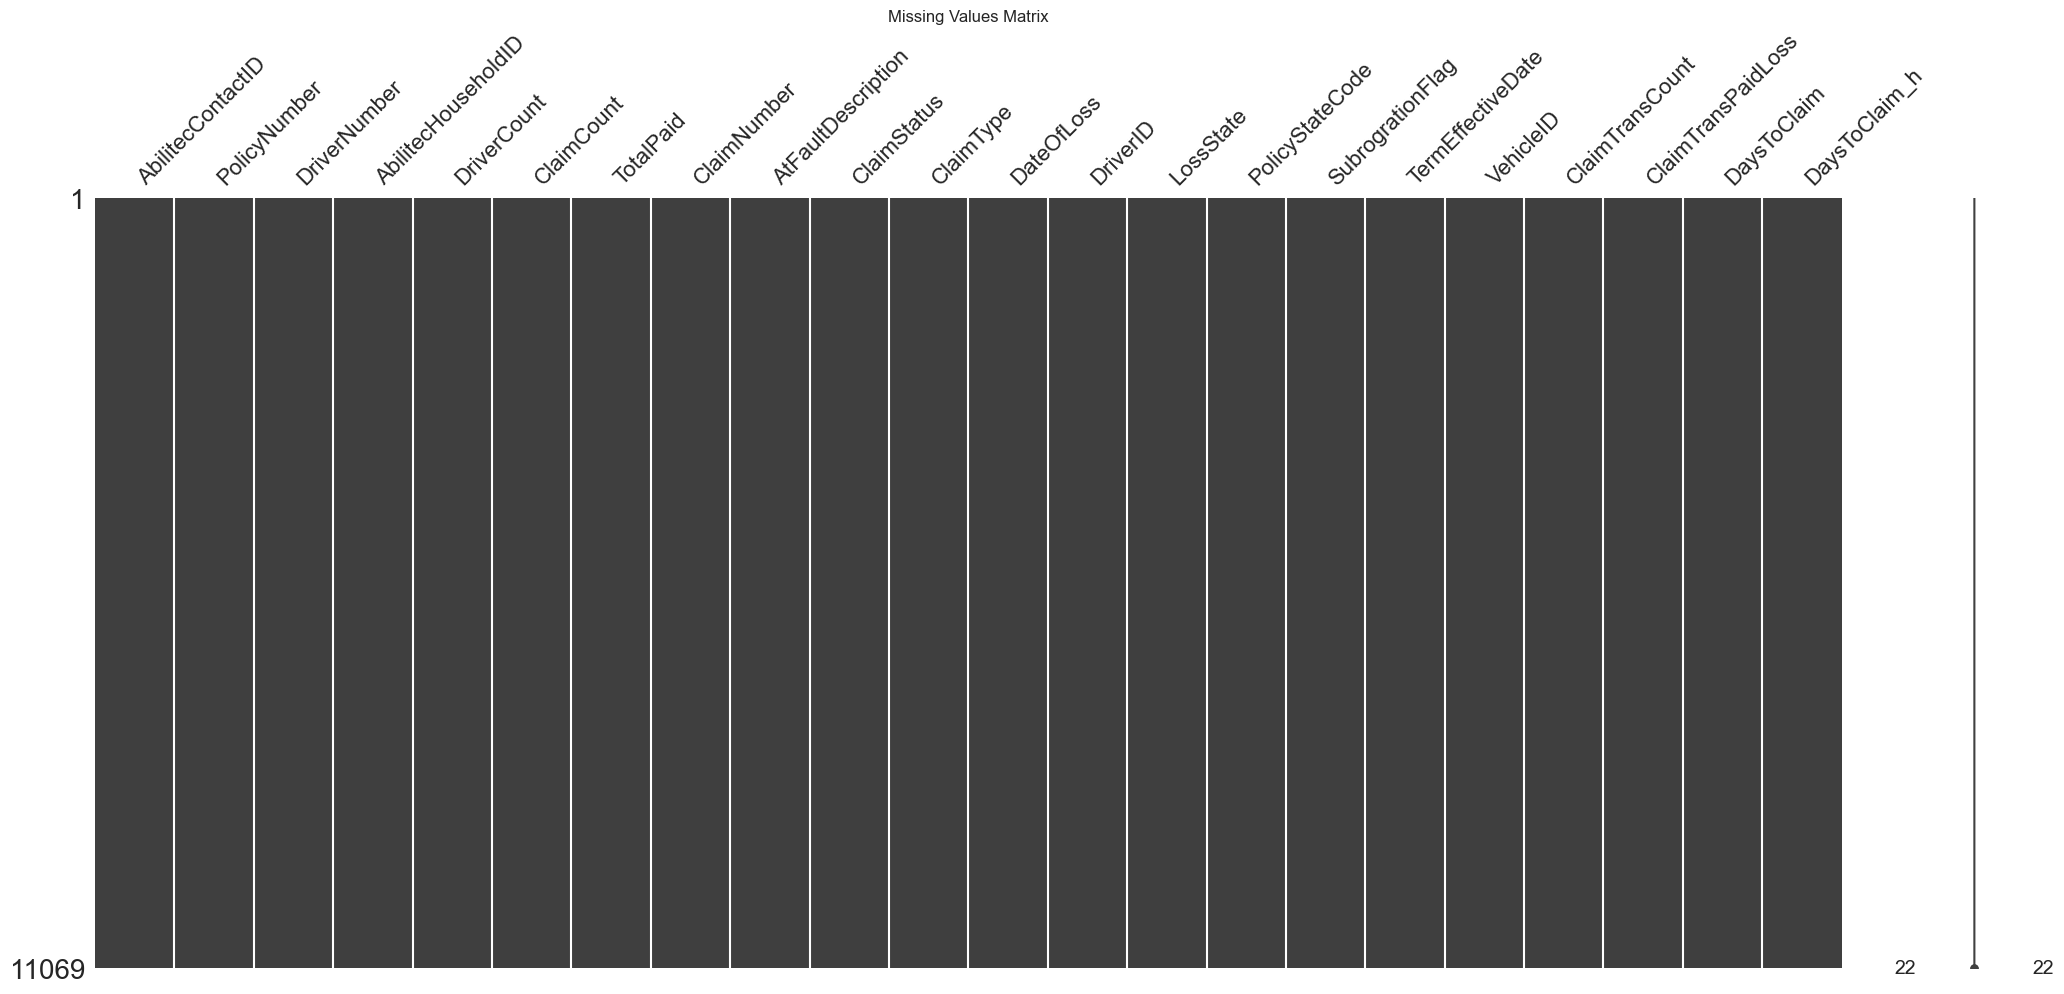

In [34]:
#Now show missing value matrix to ensure that took care of all missing values
msno.matrix(general_cleaned)
plt.title("Missing Values Matrix")
plt.show()

missing value matrix for master quote df

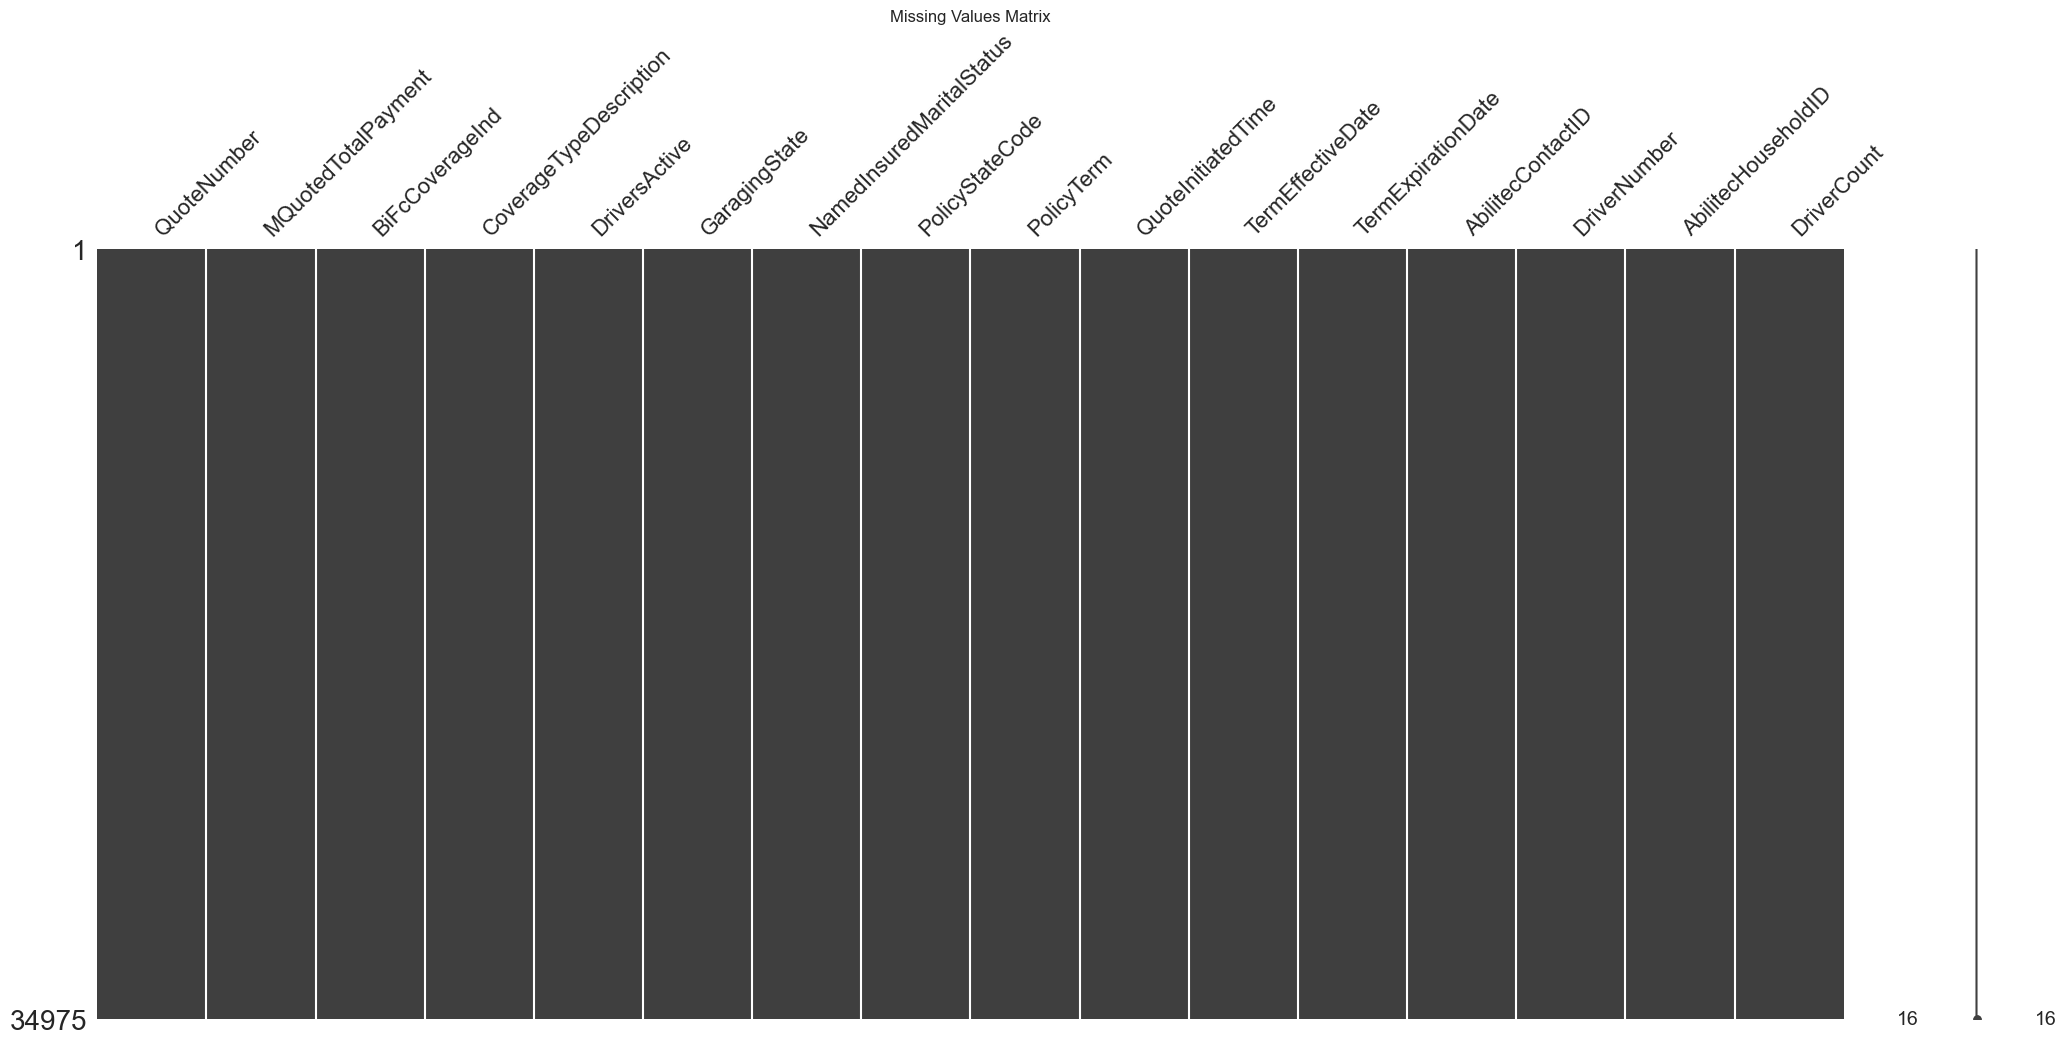

In [35]:
#Now show missing value matrix to ensure that took care of all missing values
msno.matrix(master_cleaned)
plt.title("Missing Values Matrix")
plt.show()

We can see all nan values are taken care of

## Assessing Object Variables
* I will only create dummy variables that have less than 20 unique columns

In [36]:
#first i will print out all categorical columns so I know which columns need dummy variables

#this will be for general df
gen_object_columns = general_cleaned.select_dtypes(include=['object']).columns
print(gen_object_columns)

# this iwll be for master df
mast_object_columns = master_cleaned.select_dtypes(include=['object']).columns
print(mast_object_columns)



Index(['AbilitecContactID', 'PolicyNumber', 'AbilitecHouseholdID',
       'ClaimNumber', 'AtFaultDescription', 'ClaimStatus', 'ClaimType',
       'DateOfLoss', 'LossState', 'PolicyStateCode', 'SubrogrationFlag',
       'TermEffectiveDate'],
      dtype='object')
Index(['QuoteNumber', 'BiFcCoverageInd', 'CoverageTypeDescription',
       'GaragingState', 'NamedInsuredMaritalStatus', 'PolicyStateCode',
       'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate',
       'AbilitecContactID', 'AbilitecHouseholdID'],
      dtype='object')


* from that code I can see that there is columns that will be completely unique to that person (AbilitecContactID, AbilitecHouseholdID, QuoteNumber) in the master dataframe and (AbilitecContactID, AbilitecHouseholdID) for the general df

This code will count the amount of unique things in each categorical column

In [37]:
# Count unique entries for each object column
gen_unique_counts = general_cleaned[gen_object_columns].nunique()
mast_unique_counts = master_cleaned[mast_object_columns].nunique()

print(gen_unique_counts)
print(mast_unique_counts)

AbilitecContactID       7349
PolicyNumber            7836
AbilitecHouseholdID     7505
ClaimNumber            11069
AtFaultDescription         5
ClaimStatus                2
ClaimType                 58
DateOfLoss              2644
LossState                 54
PolicyStateCode           47
SubrogrationFlag           2
TermEffectiveDate       2171
dtype: int64
QuoteNumber                  34975
BiFcCoverageInd                  4
CoverageTypeDescription          3
GaragingState                   47
NamedInsuredMaritalStatus        7
PolicyStateCode                 47
QuoteInitiatedTime           34437
TermEffectiveDate             1230
TermExpirationDate            1381
AbilitecContactID            21119
AbilitecHouseholdID          22449
dtype: int64


I will only create dummy variables for columns that have less than 20 unique values

## Dummy Variables
* Now we start creating dummy variables for all categorical columns

In [38]:
#i will get dummy variables for each categorical variable except the IDs and Quote numbers
#this is because they are unique and would create way to many columns
#also ids are unique to each person so wouldnt have much significance in predicting
#the quote

#The only categorical columns to include are the ones with less than 20 unique values


#identofying which columns to create dummy variables for in general df
gen_cat = [col for col in gen_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'PolicyNumber', 'ClaimNumber', 'TermEffectiveDate', 'PolicyStateCode', 'DateOfLoss', 'ClaimType']] #, 'LossState']]
#identify which columns to create dummy variables for in master df
mast_cat = [col for col in mast_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'QuoteNumber', 'QuoteInitiatedTime', 'TermExpirationDate', 'TermEffectiveDate', 'PolicyStateCode']] #, 'GaragingState' ]]

#generate dummy variables for all categprical columns in gen df
gen_encoded = pd.get_dummies(general_cleaned, columns=gen_cat, drop_first=False)
#generate dummy variables for all cat columns in master quote df
mast_encoded = pd.get_dummies(master_cleaned, columns=mast_cat, drop_first=True)

This code assigns gen_encoded and mast_encoded back to the df names general_cleaned and master_cleaned. It will also show the head of each file so I can ensure all dummy variables were made.

In [39]:
general_cleaned = gen_encoded
master_cleaned = mast_encoded

#general_cleaned.head()
master_cleaned.head()

QuoteNumber  MQuotedTotalPayment  DriversActive PolicyStateCode  \
0  MzM0MDA0OTE=               1136.0              1              OR   
1  MzM0MDQxNzU=                  0.0              1              IL   
2  MzM0MTc2MTk=               1160.0              2              NV   
3  MzM0MTk3MjQ=               3054.0              2              RI   
4  MzM0MjAxMjU=                  0.0              1              OH   

   PolicyTerm   QuoteInitiatedTime    TermEffectiveDate   TermExpirationDate  \
0          12  2016-01-02 22:25:47  2016-01-02 00:00:00  2017-01-02 00:00:00   
1          12  2016-01-03 12:15:55  2016-01-03 00:00:00  2017-01-03 00:00:00   
2          12  2016-01-04 11:10:58  2016-01-04 00:00:00  2017-01-04 00:00:00   
3          12  2016-01-04 12:09:06  2016-01-26 00:00:00  2017-01-26 00:00:00   
4          12  2016-01-04 12:20:07  2016-01-04 00:00:00  2017-01-04 00:00:00   

  AbilitecContactID  DriverNumber AbilitecHouseholdID  DriverCount  \
0  04ZJUS0220X4MKG7             1    04ZJUS033FV1YJP0            1   
1  04ZJUS02W4N0B2J5             1    04ZJUS03543132P3            1   
2  04ZJUS01KNTMYEQF             1    04ZJUS03X6MXZ21T            2   
3  04ZJUS02XQ1DGSDW             2    04ZJUS03ZDK4PGRF            1   
4  04ZJUS023RYMYKKP             1    04ZJUS036201CX3G            1   

   BiFcCoverageInd_BI NOFC  BiFcCoverageInd_NOBI FC  \
0                        1                        0   
1                        0                        0   
2                        1                        0   
3                        0                        0   
4                        0                        0   

   BiFcCoverageInd_NOBI NOFC  CoverageTypeDescription_Full Coverage  \
0                          0                                      0   
1                          1                                      0   
2                          0                                      0   
3                          0                                      1   
4                          1                                      0   

   CoverageTypeDescription_Liability Only  GaragingState_AL  GaragingState_AR  \
0                                       1                 0                 0   
1                                       1                 0                 0   
2                                       1                 0                 0   
3                                       0                 0                 0   
4                                       1                 0                 0   

   GaragingState_AZ  GaragingState_CA  GaragingState_CO  GaragingState_CT  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   GaragingState_DC  GaragingState_DE  GaragingState_FL  GaragingState_GA  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   GaragingState_IA  GaragingState_ID  GaragingState_IL  GaragingState_IN  \
0                 0                 0                 0                 0   
1                 0                 0                 1                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   GaragingState_KS  GaragingState_KY  Ga

### Brief Summary
* I created two clean dataframes for general df and master df called general_cleaned and master_cleaned.  In the dataframes I did not do dummy variables for categorical variables that were unique to each person because it cluded the dataset and made it hard to work with.  By eliminating the quote numbers, and IDs i went from close to 30000 columns to less than 5000 for each dataframe.  This will make it easier to work with

I will now drop all categorical variables in the cleaned dataframe that contains the dummy variables

In [40]:
general_cleaned = general_cleaned.drop(columns=general_cleaned.select_dtypes(include=['object']).columns)

master_cleaned = master_cleaned.drop(columns=master_cleaned.select_dtypes(include=['object']).columns)

info of general df to ensure the columns were dropped and the dummy variables were created

In [41]:
general_cleaned.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DriverNumber                               11069 non-null  int64  
 1   DriverCount                                11069 non-null  int64  
 2   ClaimCount                                 11069 non-null  int64  
 3   TotalPaid                                  11069 non-null  float64
 4   DriverID                                   11069 non-null  int64  
 5   VehicleID                                  11069 non-null  int64  
 6   ClaimTransCount                            11069 non-null  float64
 7   ClaimTransPaidLoss                         11069 non-null  float64
 8   DaysToClaim                                11069 non-null  float64
 9   DaysToClaim_h                              11069 non-null  float64
 10  AtFaultDescription_Com

master quote info to ensure all columns were dropped and all dummy variables were created

In [42]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   MQuotedTotalPayment                         34975 non-null  float64
 1   DriversActive                               34975 non-null  int64  
 2   PolicyTerm                                  34975 non-null  int64  
 3   DriverNumber                                34975 non-null  int64  
 4   DriverCount                                 34975 non-null  int64  
 5   BiFcCoverageInd_BI NOFC                     34975 non-null  uint8  
 6   BiFcCoverageInd_NOBI FC                     34975 non-null  uint8  
 7   BiFcCoverageInd_NOBI NOFC                   34975 non-null  uint8  
 8   CoverageTypeDescription_Full Coverage       34975 non-null  uint8  
 9   CoverageTypeDescription_Liability Only      34975 non-null  uint8  
 10  GaragingSt

## Visualizations
* This will show heat maps for each dataframe after the data was cleaned and dummy variables were added

heatmap for master_cleaned df

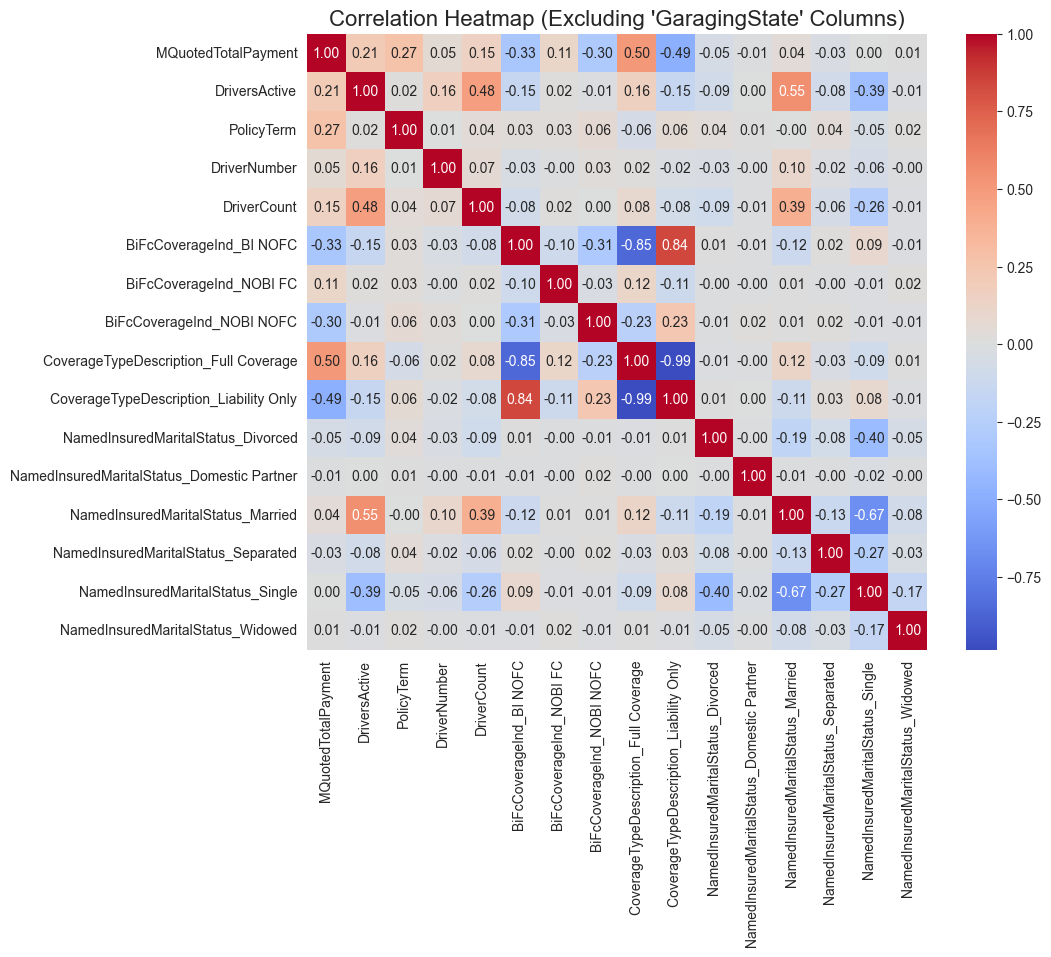

In [43]:
# Select only numeric columns and exclude columns starting with "StateLoss"
df_numeric = master_cleaned.select_dtypes(exclude=["object"])
df_numeric = df_numeric.loc[:, ~df_numeric.columns.str.startswith('GaragingState')]

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Excluding 'GaragingState' Columns)", fontsize=16)
plt.show()

heatmap for general_cleaned df

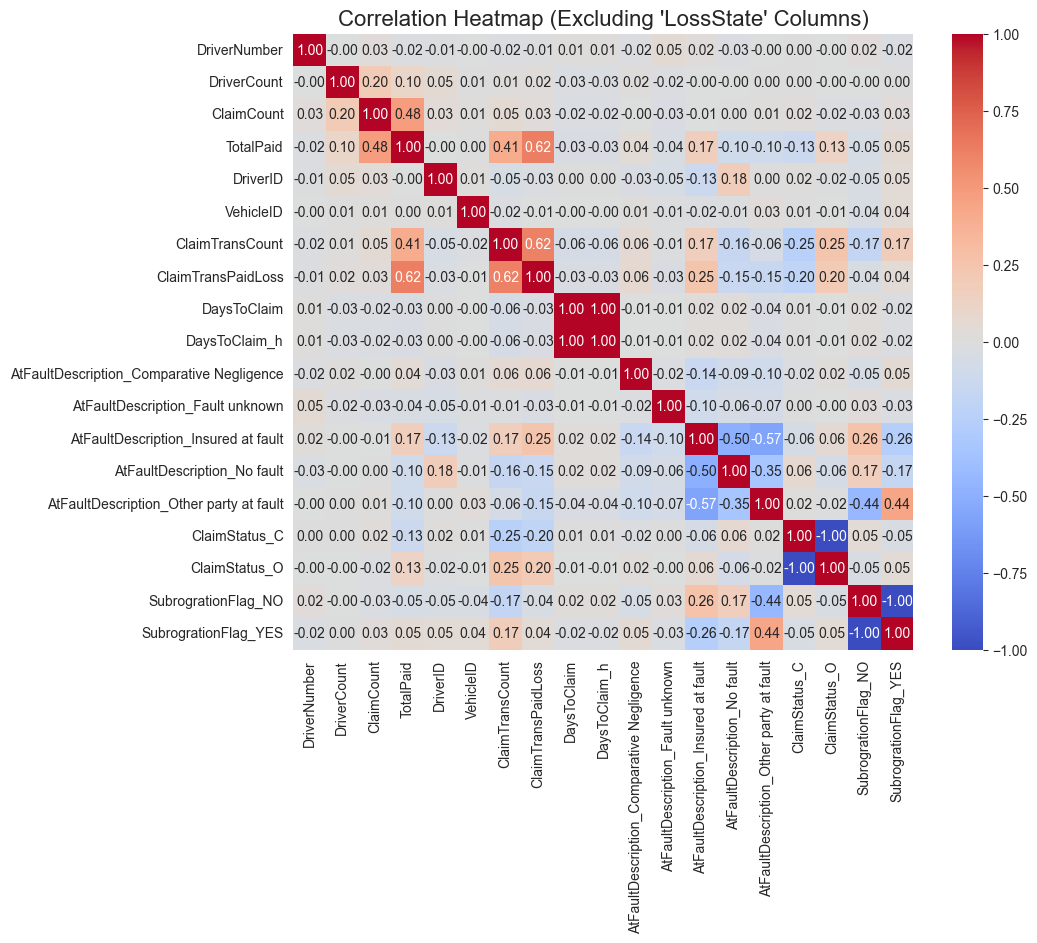

In [44]:
# Select only numeric columns and exclude columns starting with "StateLoss"
df_numeric_gen = general_cleaned.select_dtypes(exclude=["object"])
df_numeric_gen = df_numeric_gen.loc[:, ~df_numeric_gen.columns.str.startswith('LossState')]

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric_gen.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Excluding 'LossState' Columns)", fontsize=16)
plt.show()


We can see that there is some correlation between variables in the newly cleaned dataframes

## Summary
* I cleaned each dataframe so that there were no more nan values.
* I then created visulaizations to ensure that all nan values were taken care of.
* After this, I assessed the data and deleted categorical columns that contained information that was unique to each person. This was to ensure these columns did not have dummy variables created for them which would add a significant amount of columns to the dataframe and clutter the dataset.
* I then created dummy variables for all categorical columns that were left which will help me assess the data and incorperate the dataframes into my models that will be implemented in the next step.

# 3. Regression Modeling
* This section will implement 3 regression models, assess significant predictors, and assess the test statistics along with visualizations for each
* These models include Lasso model, Ridge model and Random Rorest model
* The test statistics analyzed include RMSE, MAE, R-Squared, and MAPE

## Loading Dataframes

### MasterQuote dataframe

In [47]:
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

To make my life easier, I created a block of code that will return the cleaned dataframe that I did in my data engineering notebook. This is so I can keep calling the cleaned dataframe and do not have to run through all of my engineering code everytime I want to run my regression models

This code block will put all of my data engineering that I did in my previous notebook into one block for the MasterQuote dataframe.  This will be. alarge comilation of previously commented code

In [48]:
#The comments for this code can be found in my Data Engineering section

mast_nan_percentage = df_MasterQuote.isnull().mean() * 100
master_cleaned = df_MasterQuote.loc[:, mast_nan_percentage <= 20]

mast_object_columns = master_cleaned.select_dtypes(include=['object']).columns
mast_unique_counts = master_cleaned[mast_object_columns].nunique()

mast_cat = [col for col in mast_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'QuoteNumber', 'QuoteInitiatedTime', 'TermExpirationDate', 'TermEffectiveDate', 'PolicyStateCode']]#, 'GaragingState' ]]
mast_encoded = pd.get_dummies(master_cleaned, columns=mast_cat, drop_first=False)

master_cleaned = mast_encoded

master_cleaned = master_cleaned.drop(columns=master_cleaned.select_dtypes(include=['object']).columns)

info for master cleaned df

In [49]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   MQuotedTotalPayment                         34975 non-null  float64
 1   DriversActive                               34975 non-null  int64  
 2   PolicyTerm                                  34975 non-null  int64  
 3   DriverNumber                                34975 non-null  int64  
 4   DriverCount                                 34975 non-null  int64  
 5   BiFcCoverageInd_BI FC                       34975 non-null  uint8  
 6   BiFcCoverageInd_BI NOFC                     34975 non-null  uint8  
 7   BiFcCoverageInd_NOBI FC                     34975 non-null  uint8  
 8   BiFcCoverageInd_NOBI NOFC                   34975 non-null  uint8  
 9   CoverageTypeDescription_Bond                34975 non-null  uint8  
 10  CoverageTy

## Creating Test/Train Data split
* master_cleaned includes features and a target variable
* create X dataset (only includes features)
* create y dataset (only includes target variable)
* creating train and test datasets for X and y

- then I will scale the data using standard scaler

My X will include all columns in the dataframe except my target variable, 'MQuotedTotalPayment', and all other columns that are categorical that I did not do dummy variables on.

My y will include my target variable 'MQuotedTotalPayment'

In [50]:
# keeping features for x
X = master_cleaned.drop(['MQuotedTotalPayment'], axis = 1)

#keep target variable only for y
y = master_cleaned['MQuotedTotalPayment']

creating train test split

In [51]:
# I will split the data doing a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

making discriptions and displaying head of each datframe to ensure each split was created correctly

In [52]:
display(X_train.head())
y_train.describe()

DriversActive  PolicyTerm  DriverNumber  DriverCount  \
9987               3          12             1            3   
26269              2           6             1            7   
30475              1          12             1            1   
34070              1           6             1            1   
811                1           6             1            2   

       BiFcCoverageInd_BI FC  BiFcCoverageInd_BI NOFC  \
9987                       0                        1   
26269                      0                        1   
30475                      0                        1   
34070                      1                        0   
811                        0                        0   

       BiFcCoverageInd_NOBI FC  BiFcCoverageInd_NOBI NOFC  \
9987                         0                          0   
26269                        0                          0   
30475                        0                          0   
34070                        0                          0   
811                          0                          1   

       CoverageTypeDescription_Bond  CoverageTypeDescription_Full Coverage  \
9987                              0                                      0   
26269                             0                                      0   
30475                             0                                      0   
34070                             0                                      1   
811                               0                                      0   

       CoverageTypeDescription_Liability Only  GaragingState_AK  \
9987                                        1                 0   
26269                                       1                 0   
30475                                       1                 0   
34070                                       0                 0   
811                                         1                 0   

       GaragingState_AL  GaragingState_AR  GaragingState_AZ  GaragingState_CA  \
9987                  0                 0                 0                 0   
26269                 0                 0                 0                 0   
30475                 0                 0                 0                 0   
34070                 0                 0                 0                 0   
811                   0                 0                 0                 0   

       GaragingState_CO  GaragingState_CT  GaragingState_DC  GaragingState_DE  \
9987                  0                 0                 0                 0   
26269                 0                 0                 0                 0   
30475                 0                 0                 0                 1   
34070                 0                 0                 0                 0   
811                   0                 0                 0                 0   

       GaragingState_FL  GaragingState_GA  GaragingState_IA  GaragingState_ID  \
9987                  0                 0                 0                 0   
26269                 0                 0                 0                 0   
30475                 0                 0                 0                 0   
34070                 0                 0                 0                 0   
811                   0                 0                 1                 0   

       GaragingState_IL  GaragingState_IN  GaragingState_KS  GaragingState_KY  \
9987                  0                 0                 0                 0   
26269                 0                 0                 0                 0   
30475                 0                 0                 0                 0   
34070                 0                 0                 0                 0   
811                   0                 0                 0                 0   

       GaragingState_LA  GaragingState_MD  GaragingState_ME  GaragingState_MN  \
9987             

count    27980.000000
mean      1553.616598
std       1233.879665
min          0.000000
25%        790.000000
50%       1259.000000
75%       2010.250000
max      18803.000000
Name: MQuotedTotalPayment, dtype: float64

continuation of previous code

In [53]:
display(X_test.head())
y_test.describe()

DriversActive  PolicyTerm  DriverNumber  DriverCount  \
5172               1           6             1            1   
14265              1           6             1            1   
21343              1           6             1            2   
14528              1           6             1            1   
23920              1          12             1            1   

       BiFcCoverageInd_BI FC  BiFcCoverageInd_BI NOFC  \
5172                       1                        0   
14265                      1                        0   
21343                      0                        1   
14528                      0                        1   
23920                      1                        0   

       BiFcCoverageInd_NOBI FC  BiFcCoverageInd_NOBI NOFC  \
5172                         0                          0   
14265                        0                          0   
21343                        0                          0   
14528                        0                          0   
23920                        0                          0   

       CoverageTypeDescription_Bond  CoverageTypeDescription_Full Coverage  \
5172                              0                                      1   
14265                             0                                      1   
21343                             0                                      0   
14528                             0                                      0   
23920                             0                                      1   

       CoverageTypeDescription_Liability Only  GaragingState_AK  \
5172                                        0                 0   
14265                                       0                 0   
21343                                       1                 0   
14528                                       1                 0   
23920                                       0                 0   

       GaragingState_AL  GaragingState_AR  GaragingState_AZ  GaragingState_CA  \
5172                  0                 0                 0                 0   
14265                 0                 0                 0                 0   
21343                 0                 0                 0                 0   
14528                 0                 0                 0                 0   
23920                 0                 0                 0                 0   

       GaragingState_CO  GaragingState_CT  GaragingState_DC  GaragingState_DE  \
5172                  0                 0                 0                 0   
14265                 0                 0                 0                 0   
21343                 0                 0                 0                 0   
14528                 0                 0                 0                 0   
23920                 0                 0                 0                 0   

       GaragingState_FL  GaragingState_GA  GaragingState_IA  GaragingState_ID  \
5172                  0                 0                 0                 0   
14265                 0                 0                 0                 0   
21343                 0                 0                 0                 0   
14528                 0                 0                 0                 0   
23920                 0                 0                 0                 0   

       GaragingState_IL  GaragingState_IN  GaragingState_KS  GaragingState_KY  \
5172                  0                 0                 0                 0   
14265                 0                 0                 0                 0   
21343                 0                 0                 0                 0   
14528                 0                 0                 0                 0   
23920                 0                 0                 0                 0   

       GaragingState_LA  GaragingState_MD  GaragingState_ME  GaragingState_MN  \
5172             

count     6995.000000
mean      1556.867537
std       1225.996937
min          0.000000
25%        787.960000
50%       1265.920000
75%       2038.460000
max      16473.000000
Name: MQuotedTotalPayment, dtype: float64

we can see that the y test has less than the y train so the 80/20 split worked

### Brief Summary
* I split the data into a train set and a test set.  This was successfully done and we can see that by the count in the previous code.  The count for the y_test is 6995 while the count for the y_train is 27980.  This means that our train test split works

## Scaling the data
* We are going to use the standard scaler to scale the data
* This ensures that all features are on a standard scale and will increase model performance

In [54]:
sc = StandardScaler()

#fit the x train data (calculating the means and sd of each column of X_train)
sc.fit(X_train)

#transform train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

changing scaled data to the original x_train and X_test so that everytime these variables are called it will reflect the trained data

In [55]:
# changing the X_train and X_test to the scaled versions of the data
X_train = X_train_sc
X_test = X_test_sc

### Brief Summary
* I scaled the data to ensure that it was easy to work with.  This ensures that all features are on standard scale and will in turn significantly increase the model performance

## Building the Lasso Model
* This will build a lasso model and assess which coefficients are significant predictors
* I will use Gridsearch to find the best alpha value for the lasso model

* This block of code will use gridsearch to determine the best alpha value for the lasso model to ensure we get the most accurate predictions

In [56]:
#define range of alpha values
alpha_values = np.arange(0.01, 10, 0.1)

# create the lasso model
lasso = Lasso()

#set up parameter grid
param_grid = {'alpha': alpha_values}

#set up repeated k-fold corss-validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

#set up grid search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#fit the model on full training dataset
grid_search.fit(X_train, y_train)

#Get best alpha value
best_alpha = grid_search.best_params_['alpha']

print(f'Best alpha value: {best_alpha}')

/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.971e+08, tolerance: 3.398e+06
  model = cd_fast.enet_coordinate_descent(
/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.810e+08, tolerance: 3.378e+06
  model = cd_fast.enet_coordinate_descent(
/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.347e+07, tolerance: 3.385e+06
  model = cd_fast.enet_coordinate_descent(
/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.193e+07, tolerance: 3.384e+06
  model = cd_fast.enet_coordinate_descent(
/Users/marshallsmith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

Best alpha value: 0.6100000000000001


* This block of code will take the best alpha value previously found in the grid search and implement it into the lasso model.  This will allow us to get the most accurate predictions
* The code will then return the RMSE, MAE, Rsquared, and MAPE for the best fit lasso model

In [57]:
#creating lasso best to be the lasso model with best fit alpha value
lasso_best = Lasso(alpha=best_alpha)

# fitting lasso best to the X_train and y_train
lasso_best.fit(X_train, y_train)

#assigning the predictions to y_pred_best
y_pred_best = lasso_best.predict(X_test)

#y_hat_test will be the best y predictions
y_hat_test = y_pred_best

#getting RMSE, MAE, Rsquared, and MAPE
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test) 

#printing out the statistics rounded to 2 decimal places
print(f'The test RMSE is:\t{round(test_rmse, 2)}')
print(f'The test MAE is:\t{round(test_mae, 2)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 3)}')
print(f'The test MAPE is:\t{round(test_mape, 2)}')

The test RMSE is:	828.15
The test MAE is:	534.32
The test Rsquared is:	0.544
The test MAPE is:	1.2838349354145272e+17


## Explaining Lasso Test Statistics
* This code will explain in depth what each one of these statistics mean in relation to the model and dataset

#### RMSE
* 828.15
    * The RMSE measures the average difference between values predicted by a model and the actual values. In other words, it gives us an idea of how far, on average, the predictions are from the actual values.  This means that on average, the Lasso model predictions are off by 828 units.  This is a high RMSE and shows that the model does not do a great job at predicting the target variable which in this case is the total payment
    
#### MAE
* 534.32
    * MAE is different from RMSE because it shows less significance to outliers. It calculates the average of the absolute differences between the predicted values and the actual values.  The MAE for the Lasso model is 534.32 which means on average the predictions are off by about 534.32 units.  This is a decently high MAE but not extremely high.
    
#### R-Squared
* 54%
    * Rsquared measures the amount of variance in the target variable (in this case 'MQuotedTotalPayment').  the rsquared ranges from 0-1 where 1 means the model perfectly predicts the target variable while 0 means the model doesnt predict the target variable at all.  In this case, 54% of the variance in MQuotedTotalPayment can be explained by the predictor variables in the model. This is a decent rsquared and argues that the model does a decent job predicting the target variable
    
#### MAPE
* 128%
    * MAPE tells us how far off our prediction is from the actual value as a percentage.  This MAPE of 128% shows that our predictions are way off from the actual values in many columns and this coul dbe due to a large amount of outliers, or pieces of data that behave unpredictably.  This is a good statistic to understand how the data behaves

### Significant Predictors
* I will now assess the significant predictors according to the lasso model.  This can be done by getting teh coefficients.
* I will then assess which coefficients are not 0 which would imply significance.  The higher the coefficient, the more significant the predictor is

In [58]:
#coefficients will be teh coefficients of each predictor
coefficients = pd.DataFrame(lasso_best.coef_, index=X_train.columns, columns=['Coefficient'])
print("LASSO Coefficients:\n", coefficients)

#This will identofy significant predictors which are the coef
#that aren't 0
significant_predictors = coefficients[coefficients['Coefficient'] != 0]

#making them in decending order
significant_predictors = significant_predictors.reindex(
    significant_predictors['Coefficient'].abs().sort_values(ascending=False).index
)

print("\nSignificant Predictors:\n", significant_predictors)

LASSO Coefficients:
                                             Coefficient
DriversActive                                202.794013
PolicyTerm                                   428.318635
DriverNumber                                  36.120330
DriverCount                                   85.809301
BiFcCoverageInd_BI FC                        452.983085
...                                                 ...
NamedInsuredMaritalStatus_Domestic Partner     0.474481
NamedInsuredMaritalStatus_Married            -71.767552
NamedInsuredMaritalStatus_Separated            0.000000
NamedInsuredMaritalStatus_Single             127.669655
NamedInsuredMaritalStatus_Widowed             11.710883

[65 rows x 1 columns]

Significant Predictors:
                                             Coefficient
BiFcCoverageInd_BI FC                        452.983085
PolicyTerm                                   428.318635
BiFcCoverageInd_NOBI NOFC                   -306.459002
GaragingState_FL                  

Now I will create a bar chart that helps me visualize which predictors are most significant to the dataset.
* This bar graph will only show the top 20 significant predictors to make it easier to read

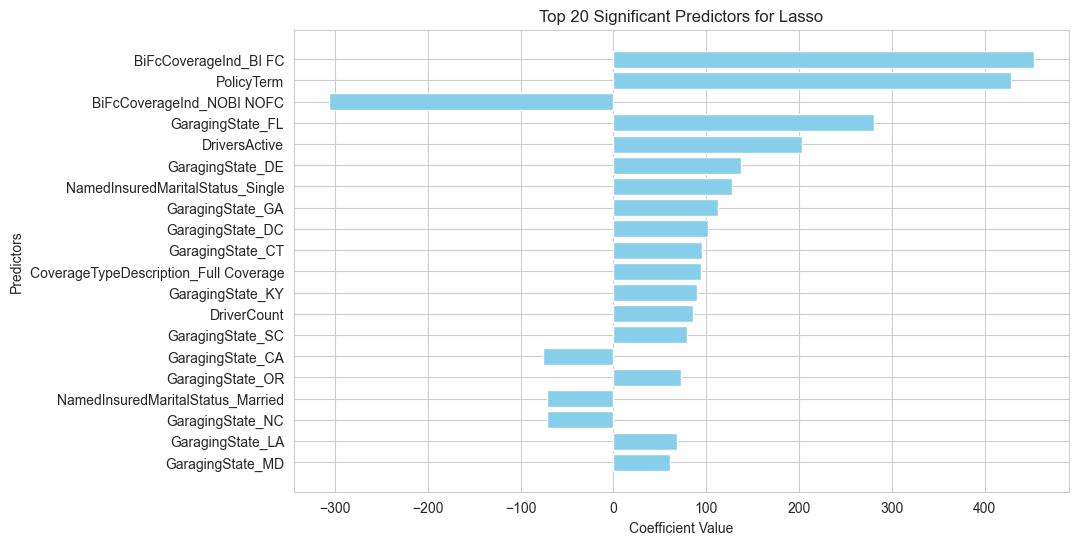

In [59]:
#selecting the top 20 predictors by absolute value
top_20_predictors = significant_predictors.loc[
    significant_predictors['Coefficient'].abs().nlargest(20).index
]



#Plotting the top 20 coef
plt.figure(figsize=(10, 6))
plt.barh(top_20_predictors.index, top_20_predictors['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')
plt.title('Top 20 Significant Predictors for Lasso')
plt.gca().invert_yaxis()  # Optional: Highest importance at the top
plt.show()

### Significant Predictors
* The top 5 predictors according to the lasso model is FC coverage, Policy term, and NOFC coverage, Garaging state of Florida and drivers active

Now I will create a dataframe with the lasso predictions, the actual values, and the residuals which show how far off each prediction is

In [60]:
#y_residuals is teh new dataframe
y_residuals = pd.DataFrame(y_test.reset_index())

#df_lasso_pred contains the lasso predictions
df_lasso_pred = pd.DataFrame(y_pred_best)

#i will then merge the two dataframes
y_residuals = pd.concat([y_residuals, df_lasso_pred], axis = 1)

#then rename colum to lasso pred
y_residuals = y_residuals.rename(columns = {0:'lasso_pred'})

#creating column for the residuals
y_residuals['Residuals'] = y_residuals['MQuotedTotalPayment'] - y_residuals['lasso_pred']

#displaying teh new dataframe
y_residuals.head()

index  MQuotedTotalPayment   lasso_pred   Residuals
0   5172              2446.00  1827.882718  618.117282
1  14265              1398.00  1561.558516 -163.558516
2  21343               456.00   -70.386051  526.386051
3  14528               665.00    30.865528  634.134472
4  23920              1401.92  2345.333886 -943.413886

Create a histogram that shows the lasso residuals

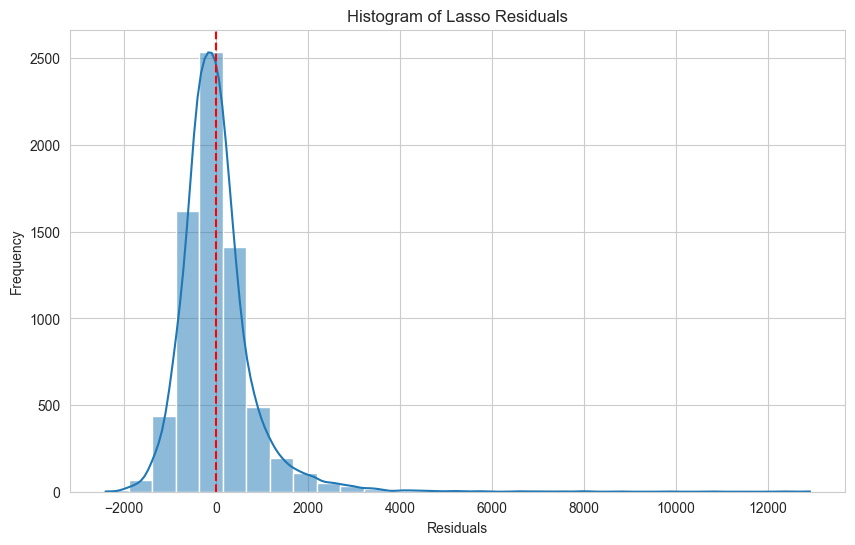

In [61]:
#plotting histogram for lasso residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_residuals['Residuals'], bins=30, kde=True)
plt.title('Histogram of Lasso Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Lasso Visualization
* This section will allow us to visualize the predictions compared to the actual values

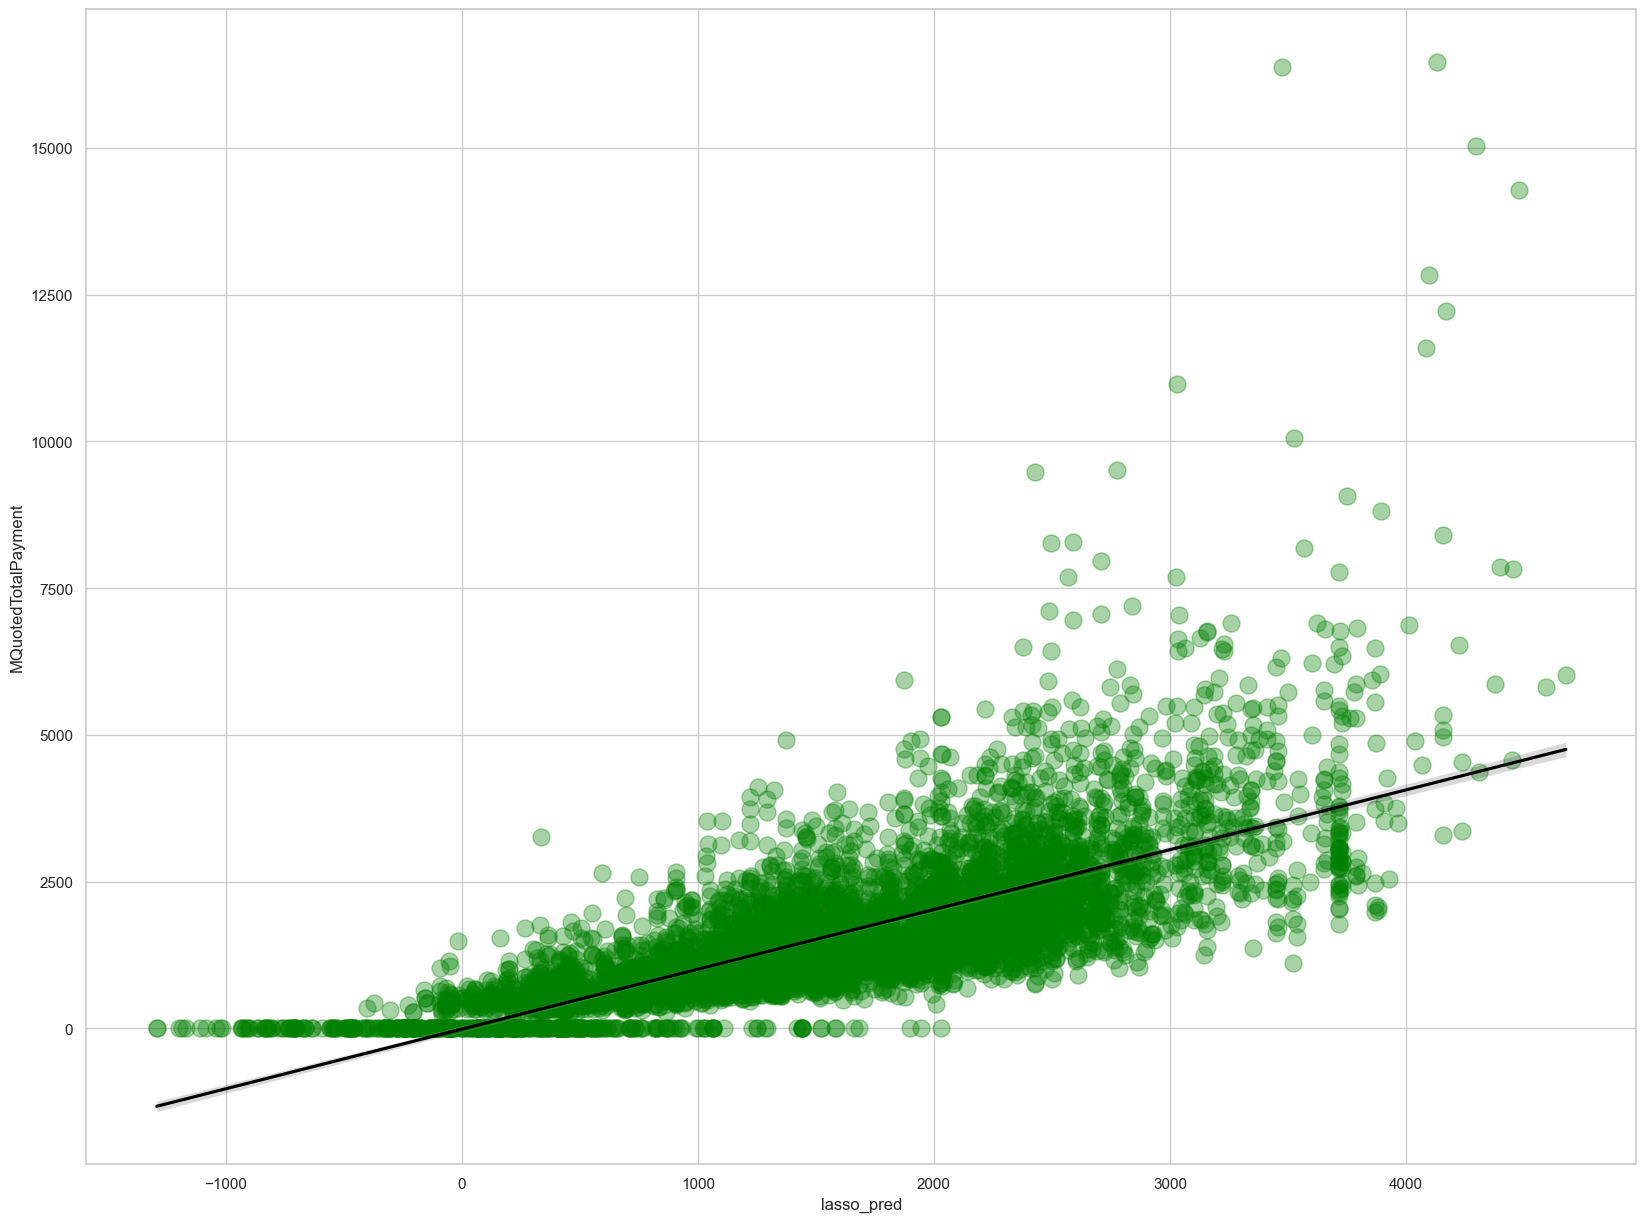

In [62]:
#using seaborn to create a visualization
sns.set(style='whitegrid')
plt.figure(figsize=(20,15)) #changes area of scatterplot
sns.regplot(x='lasso_pred', y='MQuotedTotalPayment', data = y_residuals, scatter_kws={"color":"green","alpha":0.35,"s":150},
           line_kws={'color': 'black'});

## Building the Ridge Regression Model
* This will build a ridge model and assess which coefficients are significant predictors
* I will use Gridsearch to find the best alpha value for the ridge model

This block of code will use gridsearch to determine the best alpha value for the ridge model to ensure we get the most accurate predictions

In [63]:
#define range of best alpha values
alpha_values = np.arange(0.01, 10, 0.1)

#Create ridge model
ridge = Ridge()

# Set up the parameter grid
param_grid = {'alpha': alpha_values}

# Set up repeated K-fold cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Fit the model on the full training dataset
grid_search.fit(X_train, y_train)

# Get the best alpha value and corresponding score
best_alpha = grid_search.best_params_['alpha']

print(f'Best alpha value: {best_alpha: .6f}')

Best alpha value:  9.910000


* This block of code will take the best alpha value previously found in the grid search and implement it into the ridge model.  This will allow us to get the most accurate predictions
* The code will then return the RMSE, MAE, Rsquared, and MAPE for the best fit ridge model

In [64]:
# Fit Ridge regression using the best alpha value
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Make predictions on the test dataset
ridge_pred = ridge.predict(X_test)

#y_hat_test will be ridge predictions
y_hat_test = ridge_pred

#calculating RMSE, MAE, Rsquared, and MAPE
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

#printing results
print(f'The test RMSE is:\t{round(test_rmse, 2)}')
print(f'The test MAE is:\t{round(test_mae, 2)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 3)}')
print(f'The test MAPE is:\t{round(test_mape, 2)}')

The test RMSE is:	828.08
The test MAE is:	534.66
The test Rsquared is:	0.544
The test MAPE is:	1.2898872157858016e+17


## Explaining Ridge Test Statistics
* This code will explain in depth what each one of these statistics mean in relation to the model and dataset

#### RMSE
* 828.08
    * The RMSE measures the average difference between values predicted by a model and the actual values. In other words, it gives us an idea of how far, on average, the predictions are from the actual values.  This means that on average, the Ridge model predictions are off by 828.08 units.  This RMSE is very similar to the LAsso regression model which shows that the two models do a similar job predicting the target variable. This is a high RMSE and shows that the model does not do a great job at predicting the target variable which in this case is the total payment
    
#### MAE
* 534.66
    * MAE is different from RMSE because it shows less significance to outliers. It calculates the average of the absolute differences between the predicted values and the actual values.  The MAE for the Ridge model is 534.66 which means on average the predictions are off by about 534.66 units. Again, this MAE is very similar to the lasso prediction model which further proves that the models do a similar job predicting teh target variable.  This is a decently high MAE but not extremely high.
    
#### R-Squared
* 54%
    * Rsquared measures the amount of variance in the target variable (in this case 'MQuotedTotalPayment').  The rsquared ranges from 0-1 where 1 means the model perfectly predicts the target variable while 0 means the model doesnt predict the target variable at all.  In this case, 54% of the variance in MQuotedTotalPayment can be explained by the predictor variables in the model. This is a decent rsquared and argues that the model does a decent job predicting the target variable.  Again, this r-squared is very similar to the Lasso Rsquared
    
#### MAPE
* 129%
    * MAPE tells us how far off our prediction is from the actual value as a percentage.  This MAPE of 129% shows that our predictions are way off from the actual values in many columns and this coul dbe due to a large amount of outliers, or pieces of data that behave unpredictably.  This is a good statistic to understand how the data behaves

### Significant Predictors
* I will now assess the significant predictors according to the ridge model.  This can be done by getting the coefficients.
* I will then assess which coefficients are not 0 which would imply significance.  The higher the coefficient, the more significant the predictor is

In [65]:
#coefficients will be teh coefficients of each predictor
coefficients = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=['Coefficient'])
print("Ridge Coefficients:\n", coefficients)

#This will identofy significant predictors which are the coef
#that aren't 0
significant_predictors = coefficients[coefficients['Coefficient'] != 0]

# Sort by the absolute value of the coefficients in descending order
significant_predictors = significant_predictors.reindex(
    significant_predictors['Coefficient'].abs().sort_values(ascending=False).index
)

print("\nSignificant Predictors:\n", significant_predictors)

Ridge Coefficients:
                                             Coefficient
DriversActive                                203.841483
PolicyTerm                                   429.716088
DriverNumber                                  36.616103
DriverCount                                   86.343570
BiFcCoverageInd_BI FC                        184.535698
...                                                 ...
NamedInsuredMaritalStatus_Domestic Partner     0.369629
NamedInsuredMaritalStatus_Married            -96.992887
NamedInsuredMaritalStatus_Separated          -11.828968
NamedInsuredMaritalStatus_Single             100.523851
NamedInsuredMaritalStatus_Widowed              4.126483

[65 rows x 1 columns]

Significant Predictors:
                                             Coefficient
PolicyTerm                                   429.716088
BiFcCoverageInd_NOBI NOFC                   -312.312792
GaragingState_FL                             249.490626
DriversActive                     

Now I will create a bar chart that helps me visualize which predictors are most significant to the dataset
* This bar chart will only contain the top 20 predictors to make the chart easier to read

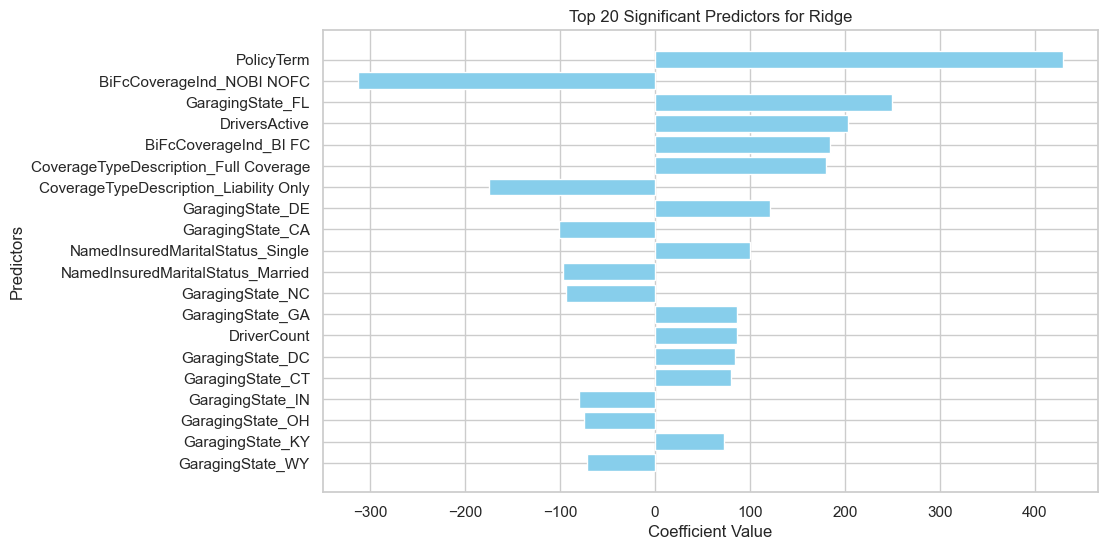

In [66]:
top_20_predictors = significant_predictors.loc[
    significant_predictors['Coefficient'].abs().nlargest(20).index
]

plt.figure(figsize=(10, 6))
plt.barh(top_20_predictors.index, top_20_predictors['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')
plt.title('Top 20 Significant Predictors for Ridge')
plt.gca().invert_yaxis()  # Optional: Highest importance at the top
plt.show()


### Significant Predictors
* We can see that the 5 most significant predictors for the Ridge Regression model are policy term, NOFC coverage, garaging state of florida, drivers active, and FC coverage

## Creating Residuals
* This will help us understand how far off our predictions are

Now I will create a dataframe with the ridge predictions, the actual values, and the residuals which show how far off each prediction is

In [67]:
#y_residuals is teh new dataframe
y_residuals_ridge = pd.DataFrame(y_test.reset_index())

#df_lasso_pred contains the ridge predictions
df_ridge_pred = pd.DataFrame(ridge_pred)

#i will then merge the two dataframes
y_residuals_ridge = pd.concat([y_residuals_ridge, df_ridge_pred], axis = 1)

#then rename colum to lasso pred
y_residuals_ridge = y_residuals_ridge.rename(columns = {0:'ridge_pred'})

#creating column for the residuals
y_residuals_ridge['Residuals'] = y_residuals_ridge['MQuotedTotalPayment'] - y_residuals_ridge['ridge_pred']

#displaying teh new dataframe
y_residuals_ridge.head()

index  MQuotedTotalPayment   ridge_pred   Residuals
0   5172              2446.00  1832.193110  613.806890
1  14265              1398.00  1563.427437 -165.427437
2  21343               456.00   -79.875851  535.875851
3  14528               665.00    19.673346  645.326654
4  23920              1401.92  2344.876077 -942.956077

Create a histogram that shows the ridge residuals

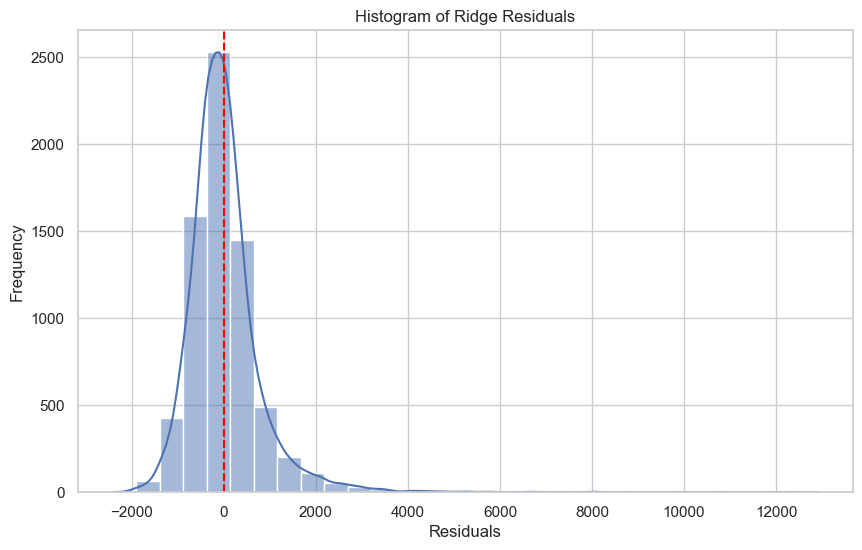

In [68]:
#plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(y_residuals_ridge['Residuals'], bins=30, kde=True)
plt.title('Histogram of Ridge Residuals') #title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Ridge Visualization
* This section will allow us to visualize the predictions compared to the actual values

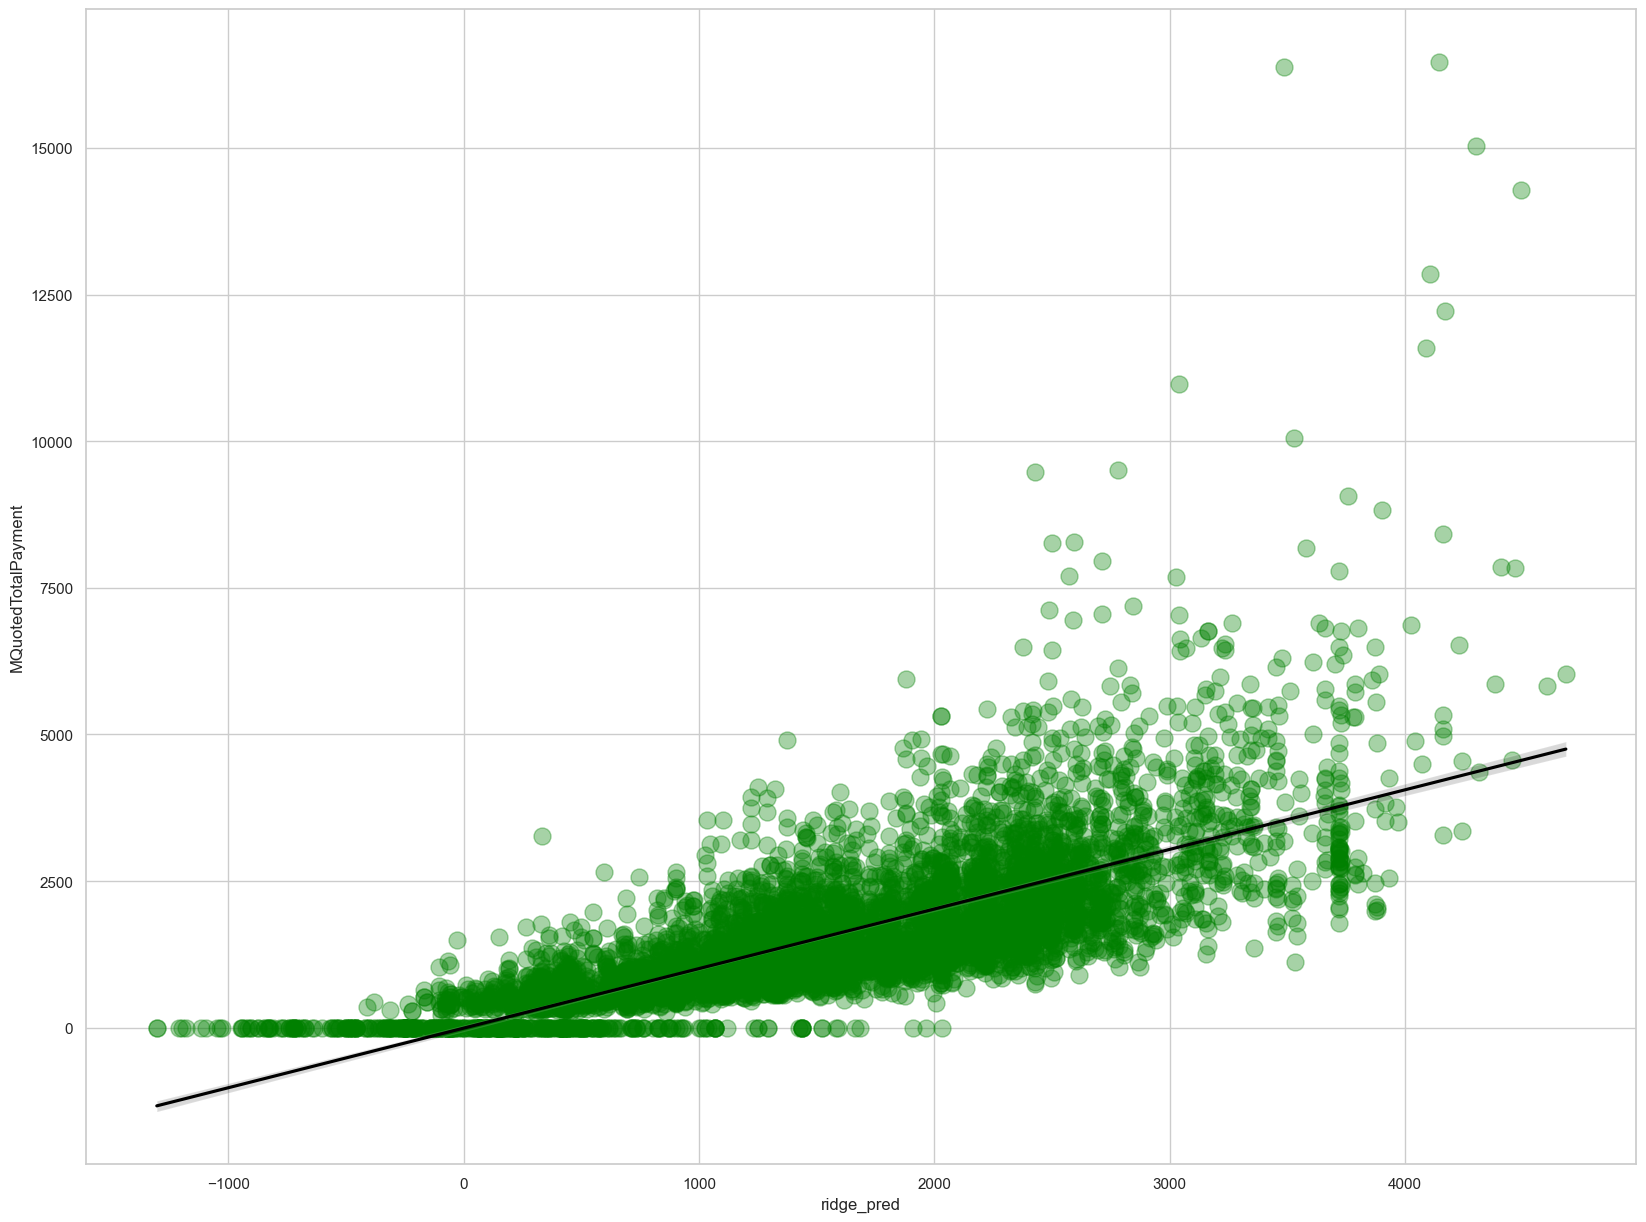

In [69]:
#using seaborn to create a visualization
sns.set(style='whitegrid')
plt.figure(figsize=(20,15)) #changes area of scatterplot
sns.regplot(x='ridge_pred', y='MQuotedTotalPayment', data = y_residuals_ridge, scatter_kws={"color":"green","alpha":0.35,"s":150},
           line_kws={'color': 'black'});

## Comparison Between Models

* This cell will include a visualization of both the Ridge and Lasso regression models

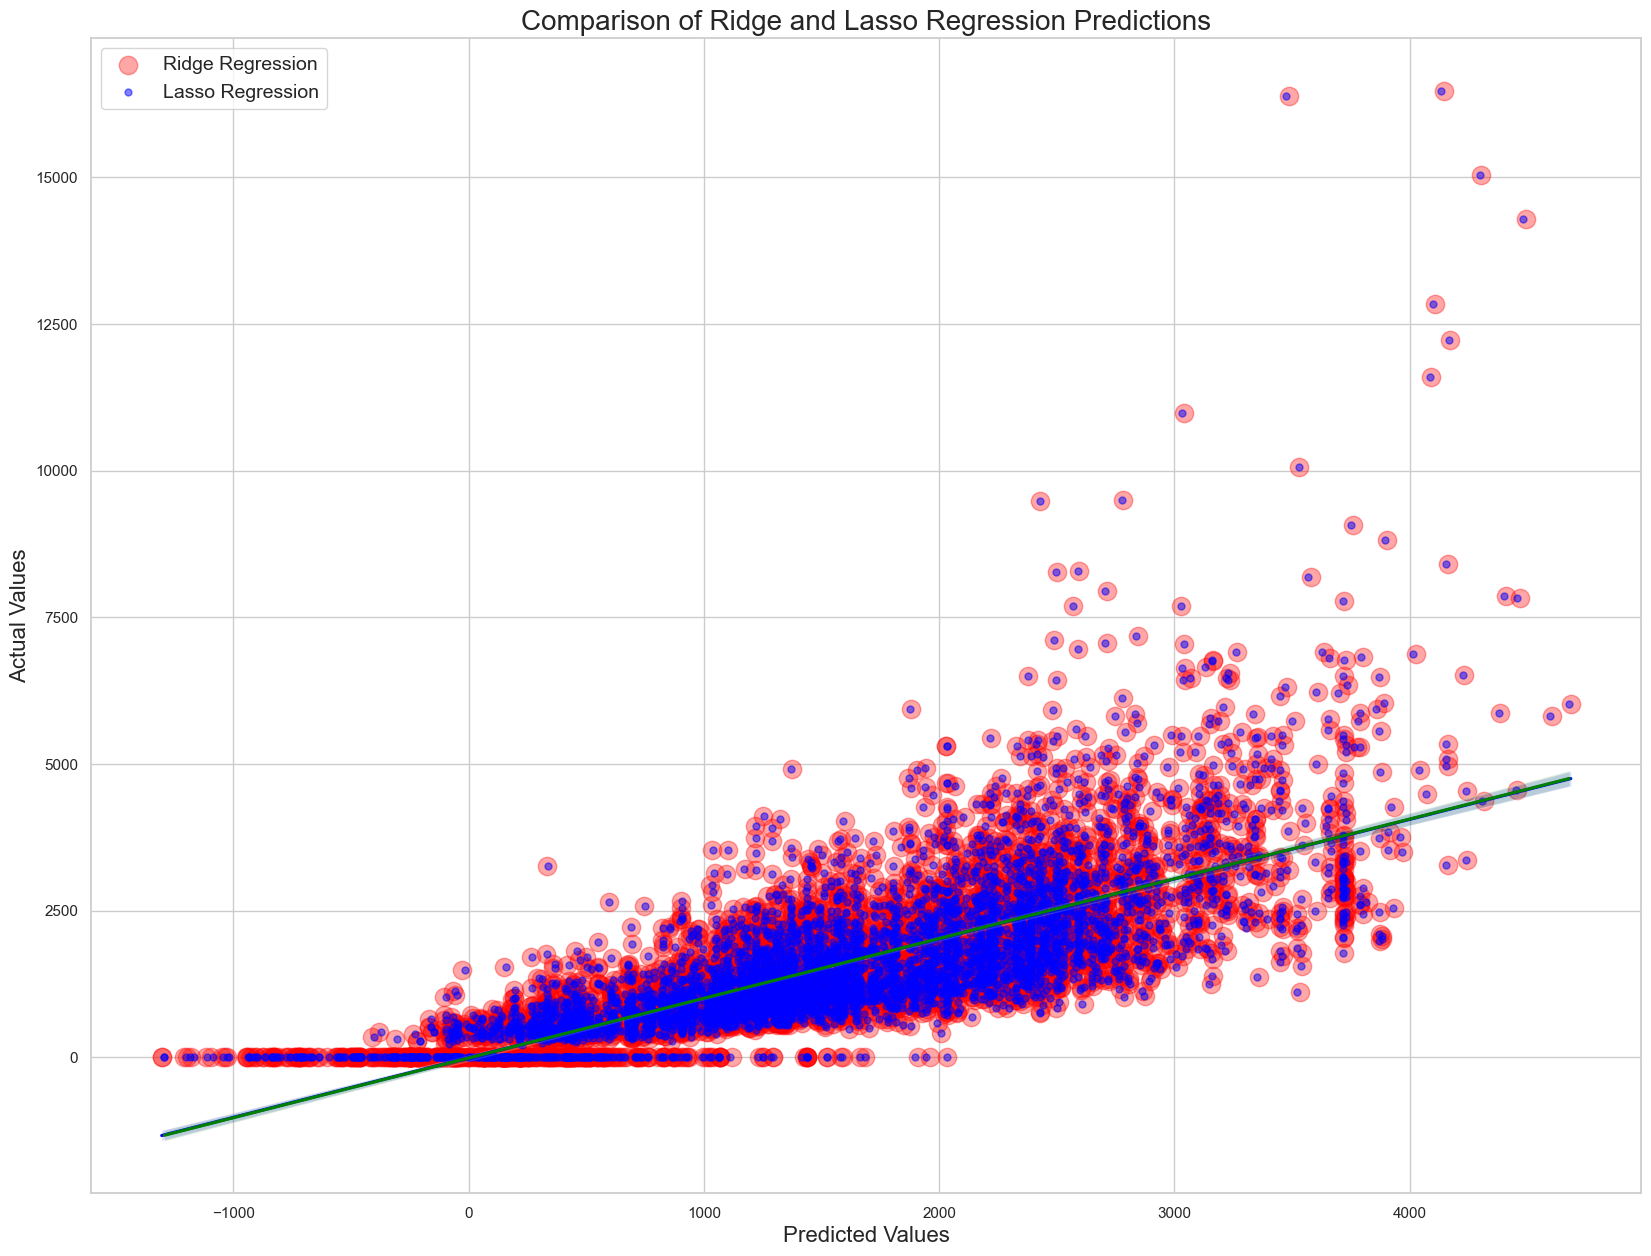

In [70]:
#Combines visualization for Lasso and Ridge


# Combined visualization for Lasso and Ridge
sns.set(style='whitegrid')
plt.figure(figsize=(20, 15))  # Adjust figure size

# Ridge regression scatterplot
sns.regplot(
    x='ridge_pred', 
    y='MQuotedTotalPayment', 
    data=y_residuals_ridge, 
    scatter_kws={"color": "red", "alpha": 0.35, "s": 175}, 
    line_kws={'color': 'blue'}, 
    label='Ridge Regression'
)

# Lasso regression scatterplot
sns.regplot(
    x='lasso_pred', 
    y='MQuotedTotalPayment', 
    data=y_residuals, 
    scatter_kws={"color": "blue", "alpha": 0.50, "s": 25}, 
    line_kws={'color': 'green'}, 
    label='Lasso Regression'
)

# Adding title, labels, and legend
plt.title("Comparison of Ridge and Lasso Regression Predictions", fontsize=20)
plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Actual Values", fontsize=16)
plt.legend(fontsize=14)
plt.show()

We can see that the two models produced very similar results

## Building the Random Forest Model
* I will assess the data using a random forest model
* I will then use grid search to ensure the best fit model

In [71]:
#Defining random forest model
rf_base = RandomForestRegressor(random_state=21)

#fit model based on training data
rf_base.fit(X_train, y_train)

#make predictions on traiing set
y_train_pred_rf = rf_base.predict(X_train)

#predictions on test set
y_test_pred_rf = rf_base.predict(X_test)

showing random forest predictions on each data split

In [72]:
print(f"Predictions on test data: {y_test_pred_rf}")

print(f"Predictions on train data: {y_train_pred_rf}")

Predictions on test data: [1213.58030495 1112.18003932  442.17811111 ...  671.69365891  816.14975999
 2903.82961486]
Predictions on train data: [1459.92541209  692.29733333 2644.2878759  ... 2022.76758043 1564.49099234
 3758.38035296]


In [73]:
y_hat_test = y_test_pred_rf

test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f'The test RMSE is:\t{round(test_rmse, 2)}')
print(f'The test MAE is:\t{round(test_mae, 2)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 2)}')
print(f'The test MAPE is:\t{round(test_mape, 2)}')

The test RMSE is:	803.38
The test MAE is:	483.31
The test Rsquared is:	0.57
The test MAPE is:	1.1130656410721422e+16


## Explaining Random Forest Test Statistics
* This code will explain in depth what each one of these statistics mean in relation to the model and dataset

#### RMSE
* 803.38
    * The RMSE measures the average difference between values predicted by a model and the actual values. In other words, it gives us an idea of how far, on average, the predictions are from the actual values.  This means that on average, the Random Forest model predictions are off by 803.38 units.  This RMSE is lower than both the Lasso and Ridge Models which means that on average the distance between the preditions and actual values are much less. This means that the random forest model is doing a better job predicting the target variable values (Total Payment) than the other two models as far as RMSE.
    
#### MAE
* 483.31
    * MAE is different from RMSE because it shows less significance to outliers. It calculates the average of the absolute differences between the predicted values and the actual values.  The MAE for the Random Forest model is 483.31 which means on average the predictions are off by about 483.31 units. This MAE is much smaller than both the Lasso and Ridge regression models which helps us further analyze that the Random Forest Model does the best job predicting the target variable Total Payment
    
#### R-Squared
* 57%
    * Rsquared measures the amount of variance in the target variable (in this case 'MQuotedTotalPayment').  The rsquared ranges from 0-1 where 1 means the model perfectly predicts the target variable while 0 means the model doesnt predict the target variable at all.  In this case, 57% of the variance in MQuotedTotalPayment can be explained by the predictor variables in the model. This is a good rsquared as it is nearing 60% and argues that the model does a good job predicting the target variable.  This cements the Random Forest model as the best prediction model of the three tested.
    
#### MAPE
* 111%
    * MAPE tells us how far off our prediction is from the actual value as a percentage.  This MAPE of 111% shows that our predictions are way off from the actual values in many columns and this coul dbe due to a large amount of outliers, or pieces of data that behave unpredictably.  This is a good statistic to understand how the data behaves.  In addition, it is important to note that while this MAPE is very high, it is still much loower than the LAsso and Ridge models

### Significant Predictors
* I will now assess the significant predictors according to the Random Forest model.  This can be done by assessing feature importance.
* I will then assess which features are not 0 which would imply importance.  The higher the importance, the more significant the predictor is

In [74]:
#displaying feature importance
feat_imp = pd.DataFrame(rf_base.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

Importance                                    Features
9     0.350852       CoverageTypeDescription_Full Coverage
1     0.152773                                  PolicyTerm
0     0.067683                               DriversActive
3     0.065108                                 DriverCount
20    0.057515                            GaragingState_FL
..         ...                                         ...
34    0.000757                            GaragingState_MT
8     0.000147                CoverageTypeDescription_Bond
10    0.000129      CoverageTypeDescription_Liability Only
60    0.000018  NamedInsuredMaritalStatus_Domestic Partner
58    0.000005       NamedInsuredMaritalStatus_Civil Union

[65 rows x 2 columns]

Now I will create a bar chart that helps me visualize which predictors are most important to the dataset

This bar chart will only contain the top 20 predictors to make the chart easier to read

<Figure size 1000x1500 with 0 Axes>

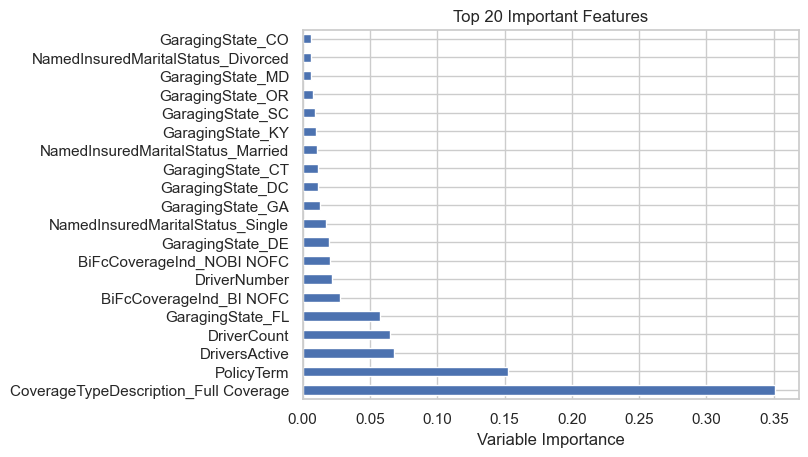

In [75]:
# Create a DataFrame for feature importances
Importance = pd.DataFrame({'Importance': rf_base.feature_importances_}, index=X.columns)

# Sort the feature importances in descending order to get the top features
Importance = Importance.sort_values('Importance', axis=0, ascending=False)

# Select the top 20 most important features
top_20_importance = Importance.head(20)

# Set the figure size to make the plot taller, improving readability
plt.figure(figsize=(10, 15))  # Width=10, Height=15 for a tall plot

# Plot the feature importances as a horizontal bar chart
top_20_importance.plot(kind='barh', color='b', linewidth=1)

# Set the x-label for the plot
plt.xlabel('Variable Importance')

# Remove the legend as it's unnecessary for this plot
plt.gca().legend_ = None

# Set the title for the plot
plt.title('Top 20 Important Features')

# Display the plot
plt.show()


### Significant Predictors
* We can see that the 5 most important features for the Random Forest model are Full Coverage type, Policy Term, Drivers active, Driver Count and garaging state of Florida.

## Random Forest Visualization
* I will visualize the random forest in multiple ways

This plot will show the predictions vs the true values

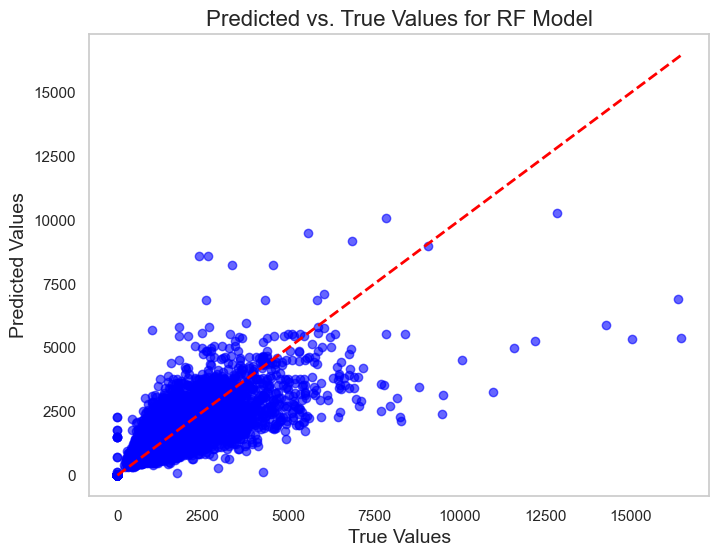

In [76]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_test, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. True Values for RF Model', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid()
plt.show()

This Cumulative Feature Importance plot will provide insight into how much of the total predictove power of a model is accounted for by the most important features

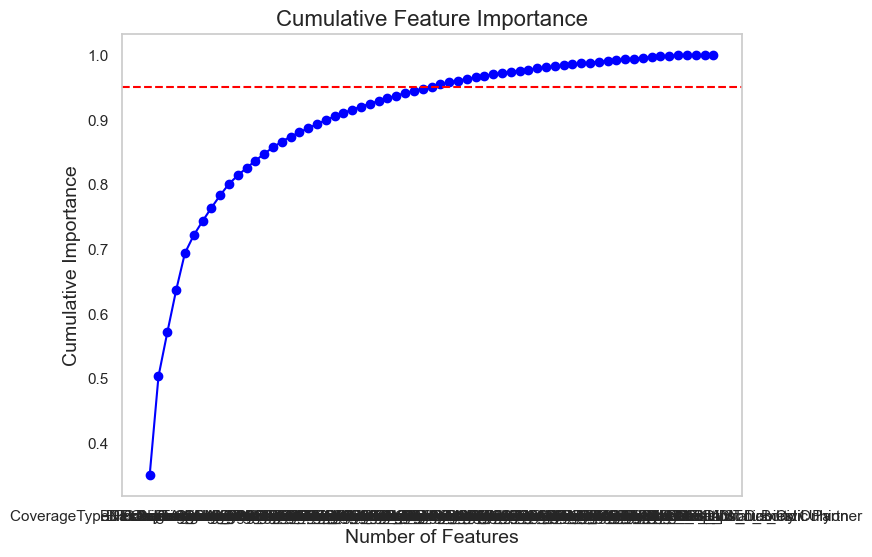

In [77]:
#importance plot
cumulative_importance = Importance['Importance'].cumsum()

plt.figure(figsize=(8, 6))
plt.plot(cumulative_importance, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.95, color='red', linestyle='--')  # Threshold at 95%
plt.title('Cumulative Feature Importance', fontsize=16)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Cumulative Importance', fontsize=14)
plt.grid()
plt.show()


## Best Fit Random Forest
* This will use grid search to find the best fit model for random forest regression

I could not for the life of me get the grid search to finish loading. I let it run at one point for two hours and all I got was the "Fitting 5 folds for each of 36 candidates, totalling 180 fits".  I let it run the entire first night that I was working on my classification models notebook as well.

In [78]:
# #first define parameter grid
# param_grid_rf = [
#     {
#         "criterion": ['squared_error', 'absolute_error'],
#         "n_estimators": [100, 150, 200],
#         "max_depth": [3, 4, 5],
#         "max_features": ['sqrt', 'log2']
#     }
# ]


# #Initialize grid search
# grid_search_rf = GridSearchCV(
#     estimator=rf_base,
#     param_grid=param_grid_rf,
#     scoring='neg_mean_squared_error',  # Metric for regression
#     cv=5,                              # 5-fold cross-validation
#     verbose=2,                         # Show progress
#     n_jobs=-1                          # Use all available processors
# )


# #fitting grid search on the training data
# grid_search_rf.fit(X_train, y_train)

# #getting the best model and parameters
# best_rf_model = grid_search_rf.best_estimator_
# best_params = grid_search_rf.best_params_


# #printing best parameters
# print("\nBest Hyperparameters:", best_params)

Now I will make prediction using the best model

In [79]:
# # using predictions from grid search to create the best fit model

# y_test_pred_best = best_rf_model.predict(X_test)

# #getting evaluation statistics
# test_mse_best = mean_squared_error(y_test, y_test_pred_best)
# test_rmse_best = np.sqrt(test_mse_best)
# test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
# test_r_squared_best = r2_score(y_test, y_test_pred_best)
# test_mape_best = mean_absolute_percentage_error(y_test, y_test_pred_best)

# #printing out results
# print(f'\nTest Metrics for Best Model:')
# print(f'Test RMSE:\t{round(test_rmse_best, 2)}')
# print(f'Test MAE:\t{round(test_mae_best, 2)}')
# print(f'Test R-Squared:\t{round(test_r_squared_best, 2)}')
# print(f'Test MAPE:\t{round(test_mape_best, 2)}')

## Summary

* I ran 3 regression models to assess which one was the most accurate at predicting the target variable, 'MQuotedTotalPayment'. Out of the Lasso Regression Model, the Ridge Regression Model, and the Random Forest Regression Model, I was able to find the model that best predicted the target variable. The model that most accurately predicted the target variable was the Random Forest Model. I ran gridsearch on each regression model type to ensure the most accurate model was created.

* I made the decision that the Random Forest Regression Model was the best fit model by first assessing the RMSE. The RF model had a RMSE of 803.38 which means that on average, the Random Forest model predictions are off by 803.38 units. This is significantly smaller than the other two models RMSE: Lasso (828.15) and Ridge (828.08). The average distance between predicted values and actual values is over 20 units less than the Lasso and Ridge models.  Therefore the Random Forest model is the better fit model according to the RMSE test statistic.

* The second test statistic that helped me make the decision that the Random Forest model was the best fit model is the MAE.  The RF model had a MAE of 483.31 which means that the absolute distance between the predicted and actual values is 483.31.  The reason the MAE is much smaller than the RMSE is because it takes the absolute value and shows less significance to outliers. This MAE is much smaller than the Lasso and Ridge models in comparison: Lasso (534.32) and Ridge (534.66). The absolute distance between actual and predicted values is over 50 units less than the Lasso and Ridge models. Therefore the Random Forest model is a better fit model according to the MAE test statistic as well.

* The next test statistic that helped me make the decision that the Random Forest model is the best fit model is the Rsquared value. The RF model had a Rsquared of 57%. This means that 57% of the variance of the target variable (MQuotedTotalPayment) can be explained by the model. The Rsquared for the RF model is slightly greater than the other modes in comparison: Lasso (54%) and Ridge (54%). The difference in the amount of variance that can be predicted is 3% better in the Random Forest model than the other models which further shows that the Random FOrest model is the best fit model for the data.

* The final test statistic that helped me make the decision that the Random Forest model is the best fit model is the MAPE.  The RF model had a MAPE of 111%.  Though this MAPE is extremely high, it is still less than the Lasso (128%) and Ridge (129%) model's MAPE.  This extremely high MAPE is likely due to the abundance of outliers within the dataset.

* Based on the four test statistics: RMSE, MAE, Rsquared, and MAPE, the Random Forest model is the best fit prediction model which means that it most accurately predicts the target variable (MQuotedTotalPayment).  The Lasso and Ridge models did similar jobs at predicting the target variable while the Random Forest model surpassed them in every statistical category.

## Most Significant Predictors

* The five most important variables accoring to the Random Forest model were Full Coverage type, Policy Term, Drivers active, Driver Count and garaging state of Florida.  This means that these variables had the most influence on predicting the target variable 'MQuotedTotalPayment'.

* The five most significant predictors for the Ridge Regression model were policy term, NOFC coverage, garaging state of florida, drivers active, and FC coverage.  This means that these variables had the most influence on the model and were the most significant variables for predicting 'MQuotedTotalPayment'.

* The five most signifcant predictors for the Lasso Regression model were  FC coverage, Policy term, and NOFC coverage, Garaging state of Florida and drivers active.  This mean sthat these variables played a significant role in predicting 'MQuotedTotalPayment' in the lasso model.


* The three most significant predictors for all models are policy term, drivers active, garaging state of florida.  This means that these three variables play the most significance in predicting 'MQuotedTotalPayment' in all models.  When assessing the total payment, it woul dbe safe to look at these 3 variables to predict the value of quoted total payment.

## Comparison Visualizations

This cell will include a visualization of both the Ridge and Lasso regression models

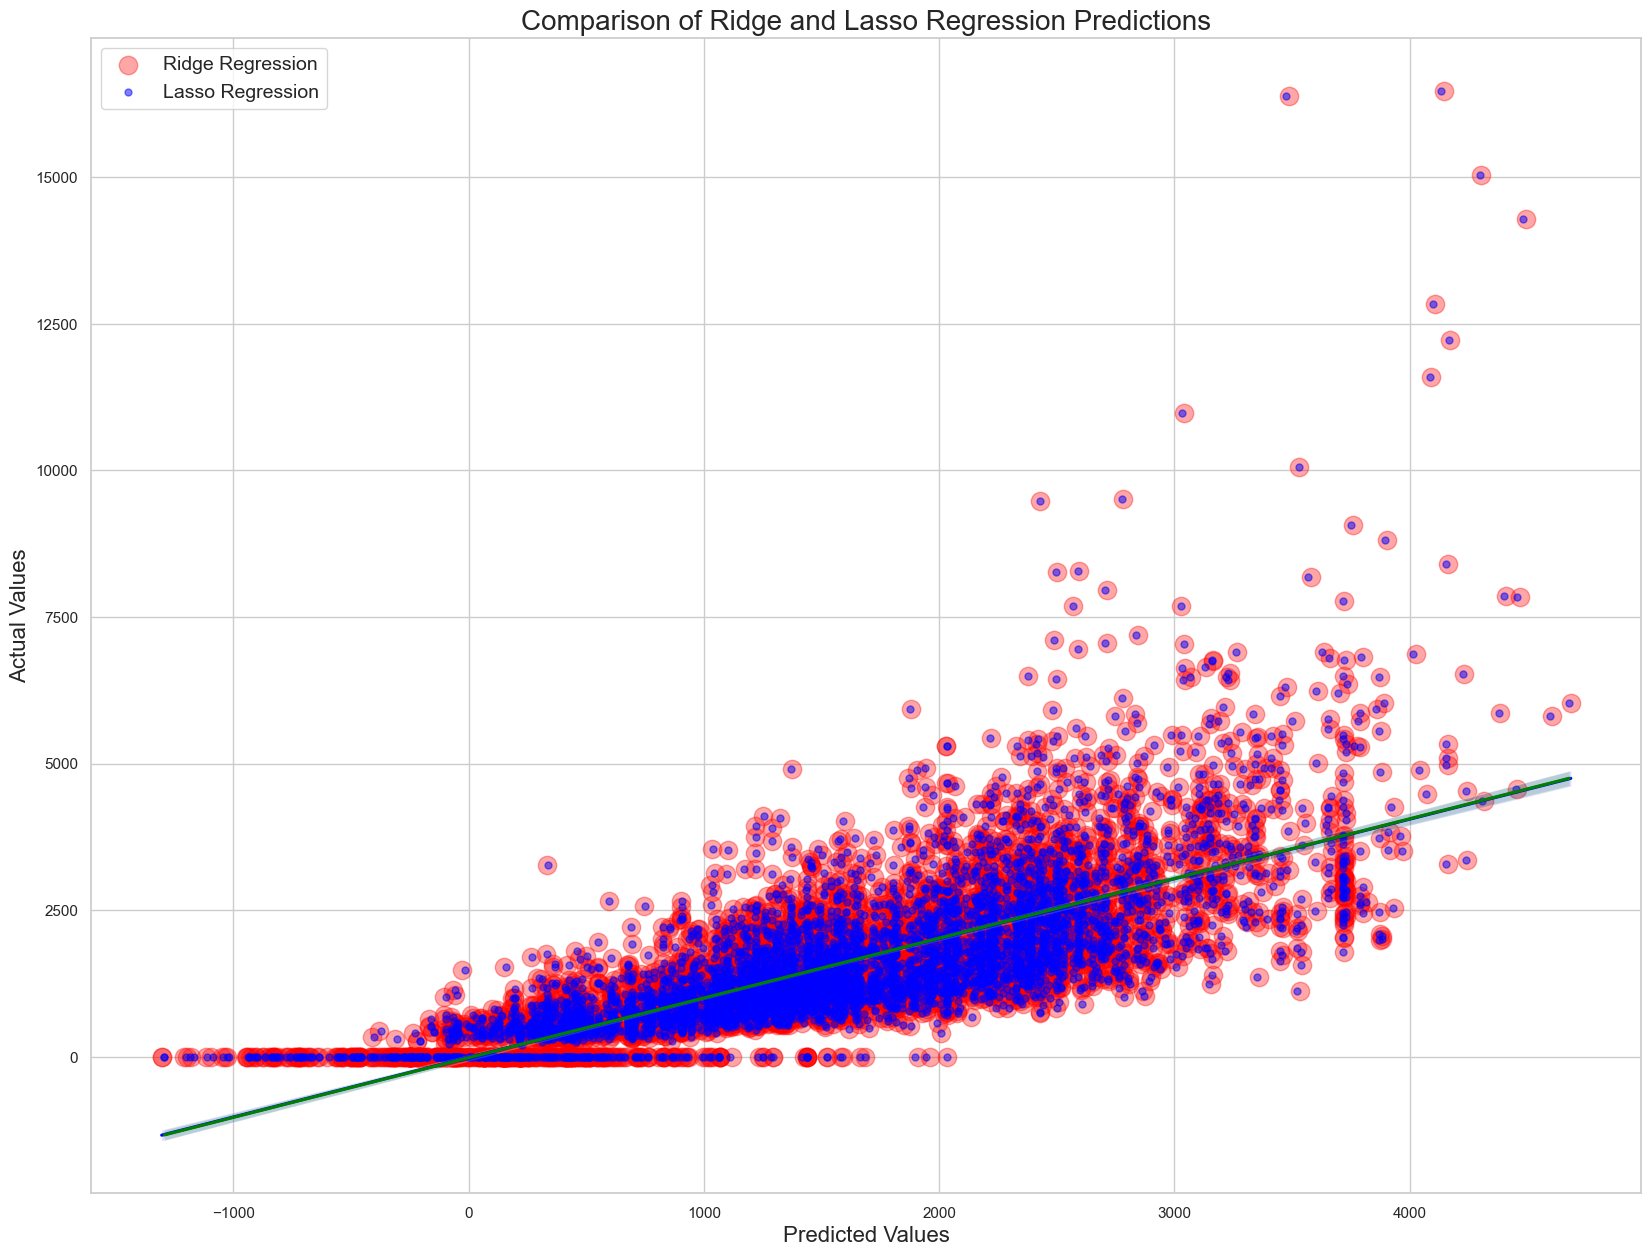

In [80]:
# Combined visualization for Lasso and Ridge
sns.set(style='whitegrid')
plt.figure(figsize=(20, 15))  # Adjust figure size

# Ridge regression scatterplot
sns.regplot(
    x='ridge_pred', 
    y='MQuotedTotalPayment', 
    data=y_residuals_ridge, 
    scatter_kws={"color": "red", "alpha": 0.35, "s": 175}, 
    line_kws={'color': 'blue'}, 
    label='Ridge Regression'
)

# Lasso regression scatterplot
sns.regplot(
    x='lasso_pred', 
    y='MQuotedTotalPayment', 
    data=y_residuals, 
    scatter_kws={"color": "blue", "alpha": 0.50, "s": 25}, 
    line_kws={'color': 'green'}, 
    label='Lasso Regression'
)

# Adding title, labels, and legend
plt.title("Comparison of Ridge and Lasso Regression Predictions", fontsize=20)
plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Actual Values", fontsize=16)
plt.legend(fontsize=14)
plt.show()


This cell will include a visualization for the Random Forest model which displays the prediction vs true values in a scatter plot

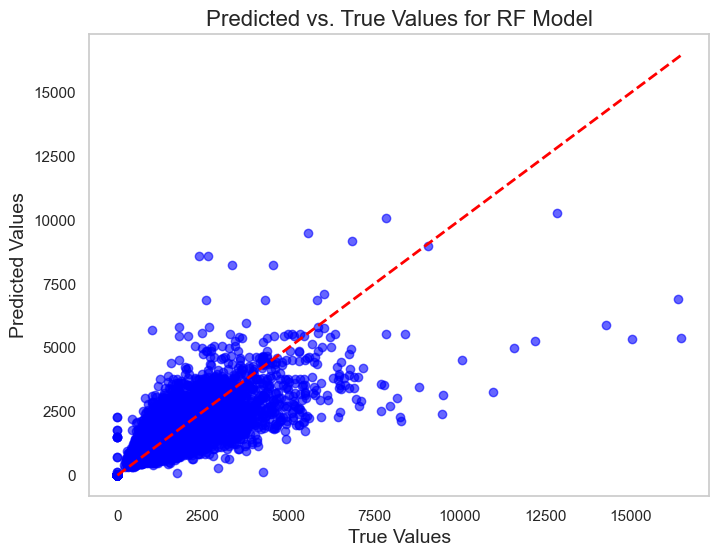

In [81]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_test, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. True Values for RF Model', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid()
plt.show()

we can see that the random forest model is more condensed in the bottom left corner. which means that the values are low.  However we can also see that the random forest model is a great model for predicting MQuotePayment.

# 4. Classification Modeling
* This section will implement 3 classification models and assess the test statistics, significant predictors, Decision Matrix, and ROC curve, along with visualizations for each model.
* The models implemented include Logistic Regression, Decision Tree, and Random Forest
* The test statistics analyzed include accuracy, sensitivity, and specificity.

This code block will put all of my data engineering that I did in my previous notebook into one block for the MasterQuote dataframe.  This will be. alarge comilation of previously commented code

In [84]:
#df_general reps general df
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)

#first calculate percentage of nan in each column and 
#put that to variable nan_percentage
gen_nan_percentage = df_TheGeneral.isnull().mean() * 100

#now we drop columns where nan values are greater than 20%
general_cleaned = df_TheGeneral.loc[:, gen_nan_percentage <= 20]

#fill nan values for categorical columns with the mode
for column in general_cleaned.select_dtypes(include=['object']).columns:
    general_cleaned[column].fillna(general_cleaned[column].mode()[0], inplace=True)
    
    #fill nan values for numerical columns with the median
for column in general_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    general_cleaned[column].fillna(general_cleaned[column].median(), inplace=True)
    
gen_object_columns = general_cleaned.select_dtypes(include=['object']).columns

# Count unique entries for each object column
gen_unique_counts = general_cleaned[gen_object_columns].nunique()

gen_cat = [col for col in gen_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'PolicyNumber', 'ClaimNumber', 'TermEffectiveDate', 'PolicyStateCode', 'DateOfLoss', 'ClaimType']]

#generate dummy variables for all categprical columns in gen df
gen_encoded = pd.get_dummies(general_cleaned, columns=gen_cat, drop_first=False)

general_cleaned = gen_encoded

general_cleaned = general_cleaned.drop(columns=general_cleaned.select_dtypes(include=['object']).columns)

general_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DriverNumber                               11069 non-null  int64  
 1   DriverCount                                11069 non-null  int64  
 2   ClaimCount                                 11069 non-null  int64  
 3   TotalPaid                                  11069 non-null  float64
 4   DriverID                                   11069 non-null  int64  
 5   VehicleID                                  11069 non-null  int64  
 6   ClaimTransCount                            11069 non-null  float64
 7   ClaimTransPaidLoss                         11069 non-null  float64
 8   DaysToClaim                                11069 non-null  float64
 9   DaysToClaim_h                              11069 non-null  float64
 10  AtFaultDescription_Com

## Creating a Target Variable
ClaimCount and TotalPaid:

ClaimCount: The number of claims a driver has made.
TotalPaid: The total amount paid for the claims.
Customers with a high number of claims or large total payments may be considered high risk.
ClaimTransCount and ClaimTransPaidLoss:

ClaimTransCount: The number of transactions related to a claim.
If the customer has high trans count, they could be flagged as high risk.

DaysToClaim: The number of days between the policy start and the claim. Customers who file claims shortly after the policy starts may be flagged as high risk (e.g., opportunistic behavior).

AtFaultDescription columns:
AtFaultDescription_Comparative Negligence,AtFaultDescription_Fault unknown, AtFaultDescription_Insured at fault, AtFaultDescription_No fault, AtFaultDescription_Other party at fault

These describe who was at fault for the claim. If the insured driver is at fault more often, they may be more likely to be a high-risk customer.


These are my parameters to determine a high risk customer

In [85]:
high_risk = []

claim_count_median = general_cleaned["ClaimCount"].median()
total_paid_median = general_cleaned["TotalPaid"].median()
claim_trans_count_median = general_cleaned["ClaimTransCount"].median()
days_to_claim_threshold = 30  # Days to claim is less than 30
at_fault_condition = (general_cleaned["AtFaultDescription_Insured at fault"] == 1) | \
                     (general_cleaned["AtFaultDescription_Fault unknown"] == 1)

for index, row in general_cleaned.iterrows():
    conditions_met = 0

    # Check each condition
    if row["ClaimCount"] > claim_count_median:
        conditions_met += 1
    if row["TotalPaid"] > total_paid_median:
        conditions_met += 1
    if row["ClaimTransCount"] > claim_trans_count_median:
        conditions_met += 1
    if row["DaysToClaim"] < days_to_claim_threshold:
        conditions_met += 1
    if at_fault_condition.iloc[index]:  # Check if the driver is at fault
        conditions_met += 1

    # If at least two conditions are met, consider the customer high risk
    if conditions_met >= 4:
        high_risk.append(1)
    else:
        high_risk.append(0)

# Add the high_risk column to the DataFrame
general_cleaned["high_risk"] = high_risk

# Display the first few rows
general_cleaned.head(20)


DriverNumber  DriverCount  ClaimCount  TotalPaid  DriverID  VehicleID  \
0              1            4           1    5086.61        98          1   
1              1            2           1       0.00         1          1   
2              1            2           1   21397.74         1          1   
3              1            5           3       0.00        98          2   
4              1            5           3       0.00         1          2   
5              1            5           3       0.00         1          4   
6              1            1           1       0.00         1          1   
7              1            4           2     139.90         1          1   
8              1            4           2     139.90         1          1   
9              1            2           1    1437.07         1          1   
10             1            2           1   11456.91        98          1   
11             1            1           1    3433.30         1          2   
12             1            2           1       0.00         1          1   
13             1            1           2    4155.00         1          1   
14             1            1           2    4155.00         1          1   
15             1            1           1       0.00         1          1   
16             1            1           1    7666.59         1          1   
17             1            1           1    3789.32         1          1   
18             1            1           1    2862.01         1          2   
19             1            3           1    1196.35        98          1   

    ClaimTransCount  ClaimTransPaidLoss  DaysToClaim  DaysToClaim_h  \
0               9.0             5086.61          0.0            0.0   
1               4.0                0.00          0.0            0.0   
2              53.0            21397.74          0.0            0.0   
3              14.0                0.00          0.0            0.0   
4               1.0                0.00          0.0            0.0   
5               8.0                0.00          0.0            0.0   
6               1.0                0.00          0.0            0.0   
7               6.0               69.95          0.0            0.0   
8               6.0               69.95          0.0            0.0   
9               6.0             1437.07          0.0            0.0   
10             12.0            11456.91          0.0            0.0   
11             20.0             3433.30          0.0            0.0   
12              1.0                0.00        148.0         3552.0   
13              7.0             4155.00          0.0            0.0   
14              4.0                0.00          0.0            0.0   
15              4.0                0.00          0.0            0.0   
16             33.0             7666.59          0.0            0.0   
17              7.0             3789.32          0.0            0.0   
18             10.0             2862.01          0.0            0.0   
19             12.0             1196.35          0.0            0.0   

    AtFaultDescription_Comparative Negligence  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   
6                                           0   
7                                           0   
8                                           0   
9                                           0   
10                                          0   
11                                          0   
12                                          0   
13                                          0   
14                                          0   
15                                          0   
16                                          0   
17          

this code will show us the number of high risk customers vs not. 1 being high risk 0 being not

In [86]:
# Count the number of rows for each high_risk category
high_risk_counts = general_cleaned["high_risk"].value_counts()

# Display the counts
print(high_risk_counts)

0    7203
1    3866
Name: high_risk, dtype: int64


This cell will show us unique values

In [87]:
# Display all unique values in the 'DaysToClaim' column
unique_values = general_cleaned['DaysToClaim'].unique()

# Print the unique values
print("Unique values in 'DaysToClaim':")
print(unique_values)

Unique values in 'DaysToClaim':
[ 0.00000000e+00  1.48000000e+02  1.00000000e+01  3.00000000e+01
  1.30000000e+01  1.50000000e+01  6.40000000e+01  1.80000000e+01
  5.41666667e-01  6.25000000e-01  6.97916667e-01  5.00000000e-01
  9.23611111e-01  7.50000000e-01  6.66666667e-01  5.20833333e-01
  7.70833333e-01  4.47916667e-01  4.79166667e-01  4.89583333e-01
  6.94444444e-04  6.56250000e-01  4.72222222e-01  7.22222222e-01
  1.80555556e-01  5.11805556e-01  3.43750000e-01  5.93750000e-01
  7.29166667e-01  4.37500000e-01  3.52777778e-01  8.95833333e-01
  6.77083333e-01  6.87500000e-01  5.27777778e-01  7.36111111e-01
  7.29166667e-02  8.12500000e-01  4.16666667e-01  6.45833333e-01
  2.00000000e+00  2.29166667e-01  8.75000000e-01  4.58333333e-01
  7.12500000e-01  1.00000000e+00  1.10000000e+01  6.00000000e+00
  2.70000000e+02  3.10000000e+01  1.53000000e+02  4.00000000e+00
  8.00000000e+00  5.60000000e+01  2.00000000e+01  2.50000000e+01
  5.00000000e+00  2.10000000e+01  3.20000000e+01  4.200000

## Creating Test/Train Data split
- split data into training (70%) and testing (30%)
* general_cleaned includes features and a target dsataset
* create X dataset (only includes features)
* create y dataset (only includes target variable) (high risk)
* creating train and test datasets for X and y

- then I will scale the data using standard scaler

In [88]:
# create var for target variable
target_var = "high_risk"

#definng features(x) and target(y)
X = general_cleaned.drop(target_var, axis = 1)
y = general_cleaned[target_var]


# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

This cell will ensure that we have even class distribution

In [89]:
#Checking Class Distribution
print("\nClass Distribution in Original Data:")
print(y.value_counts(normalize=True))
print("\nClass Distribution in Training Data:")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution in Test Data:")
print(y_test.value_counts(normalize=True))


Class Distribution in Original Data:
0    0.650736
1    0.349264
Name: high_risk, dtype: float64

Class Distribution in Training Data:
0    0.650749
1    0.349251
Name: high_risk, dtype: float64

Class Distribution in Test Data:
0    0.650708
1    0.349292
Name: high_risk, dtype: float64


Apply standard scaler and show the training set and test set size

In [90]:
#standard scaler
sc = StandardScaler()

# Scale using NumPy arrays
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Convert to DataFrames only when needed (e.g., for interpretation or feature selection)
X_train_scaled_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_sc, columns=X_test.columns)

# Print Dataset Sizes
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 7748
Test set size: 3321


## Logistic Regression Model
* I will now create a logistic regression model for my first classification model
* I will do this using grid search to find the best fit model

In [91]:
#defining grid
grid = {
    "C": np.logspace(-3, 1, 10),
    "penalty": ["l1", "l2"],  # Penalty norm for regularization
    "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:5}],  # Class weight options
    "solver": ['lbfgs', 'liblinear']  # Solver options
}

#initialing a logistic regression model with spec random state
logreg = LogisticRegression(class_weight='balanced', random_state=21, max_iter = 25000)

#initialing grid search w log regression, using 10-fold cross validation
logreg_cv = GridSearchCV(logreg, grid, cv=3, n_jobs = -1) #, scoring = scoring)#, refit = 'accuracy')

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train_sc, y_train)

# Print the best hyperparameters found during the search
print("Tuned hyperparameters: (best parameters)", logreg_cv.best_params_)

Tuned hyperparameters: (best parameters) {'C': 0.05994842503189409, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


Taking best parameters and implementingt them into the logistic regression to ensure best model

In [92]:
# Set the model properties based on the specified configuration
best_lr = LogisticRegression(random_state=21,       # Set the random state for reproducibility
                            C=0.05994842503189409,                # Regularization parameter
                            class_weight= None,  # Class weights to handle class imbalance
                            penalty='l1',         # Penalty norm for regularization
                            solver='liblinear'    # Solver for optimization
                           )

best_lr.fit(X_train_sc, y_train)
#variable for best logistic regression model
best_lr_pred = best_lr.predict(X_test_sc)
lr_pred_proba = best_lr.predict_proba(X_test_sc)[:, 1]

## Reporting the Test Statistics
* This section will report the accuracy score, sensitivity, specificity and ROC AUC. Along with a classification report and a simple confusion matrix

In [93]:
#Evaluating the model and calculating the metrics
lr_accuracy = accuracy_score(y_test, best_lr_pred)
lr_conf_matrix = confusion_matrix(y_test, best_lr_pred)
lr_tn, lr_fp, lr_fn, lr_tp = lr_conf_matrix.ravel()
lr_sensitivity = lr_tp / (lr_tp + lr_fn)  # True Positive Rate (Recall)
lr_specificity = lr_tn / (lr_tn + lr_fp)  # True Negative Rate
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"Accuracy: {lr_accuracy:.2f} \n")
print(f"Sensitivity (Recall): {lr_sensitivity:.2f} \n")
print(f"Specificity: {lr_specificity:.2f} \n")
print(f"ROC AUC: {lr_roc_auc:.2f} \n")

print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, best_lr_pred))

Accuracy: 0.90 

Sensitivity (Recall): 0.81 

Specificity: 0.95 

ROC AUC: 0.95 

Confusion Matrix:
[[2043  118]
 [ 220  940]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2161
           1       0.89      0.81      0.85      1160

    accuracy                           0.90      3321
   macro avg       0.90      0.88      0.89      3321
weighted avg       0.90      0.90      0.90      3321



## Analyzing Test Statistics
* I will assess the models accuracy, sensitivity and specificity

#### Accuracy
* 0.90
    * Accuracy measures the proportion of correctly classified instances (both true positives and true negatives) out of all instances.  It is basically a ratio of correct preditions to the total number of predictions made
* In relation to this model, an accuracy of .90 means that 90% of the total predictions made by the logistic regression model are correct, whether the instance is positive or nagative.  This is generally a strong result.

#### Sensitivity (Recall)
* 0.81
    * Sensitivity measures the proportion of actual positive instances (high_risk) that are correctly identified by the model. In reference to a logistic regression model, sensitivity tells us how well the model identifies the true positives.
* A sensitivity of 0.81 means that 81% of the actual positive instances (high_risk) are correctly identified as positive by the logistic regression model. This indicates that the model is relatively good at identifying positive cases.

#### Specificity
* 0.95
    * Specificity measures the proportion of actual negative instances (low risk) that are correctly identofied as negative by the model. This statistic plays a vital role in insuring that we correctly identify negative cases and minimize false positives.
* A specificity of 0.95 means that 95% of the actual negative instances (low risk) are correctly identified as negaive. This shows that the logistic regression model is very good at correctly identifying instances where the outcome is negative.

## Significant Features
* I will now assess important features by getting the absolute value of coefficients, then printinb them in descending order

In [94]:
# Extract feature importance and sort by absolute value of coefficients
lr_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print the sorted importance
print("Predictor Importance:")
print(lr_importance)

Predictor Importance:
                                Feature  Coefficient
6                       ClaimTransCount     1.620313
12  AtFaultDescription_Insured at fault     1.311290
2                            ClaimCount     1.148833
7                    ClaimTransPaidLoss     0.835880
3                             TotalPaid     0.438798
..                                  ...          ...
33                         LossState_IN     0.000000
32                         LossState_IL     0.000000
30                         LossState_IA     0.000000
29                         LossState_HI     0.000000
36                         LossState_LA     0.000000

[73 rows x 2 columns]


plotting the top 20 significant predictors

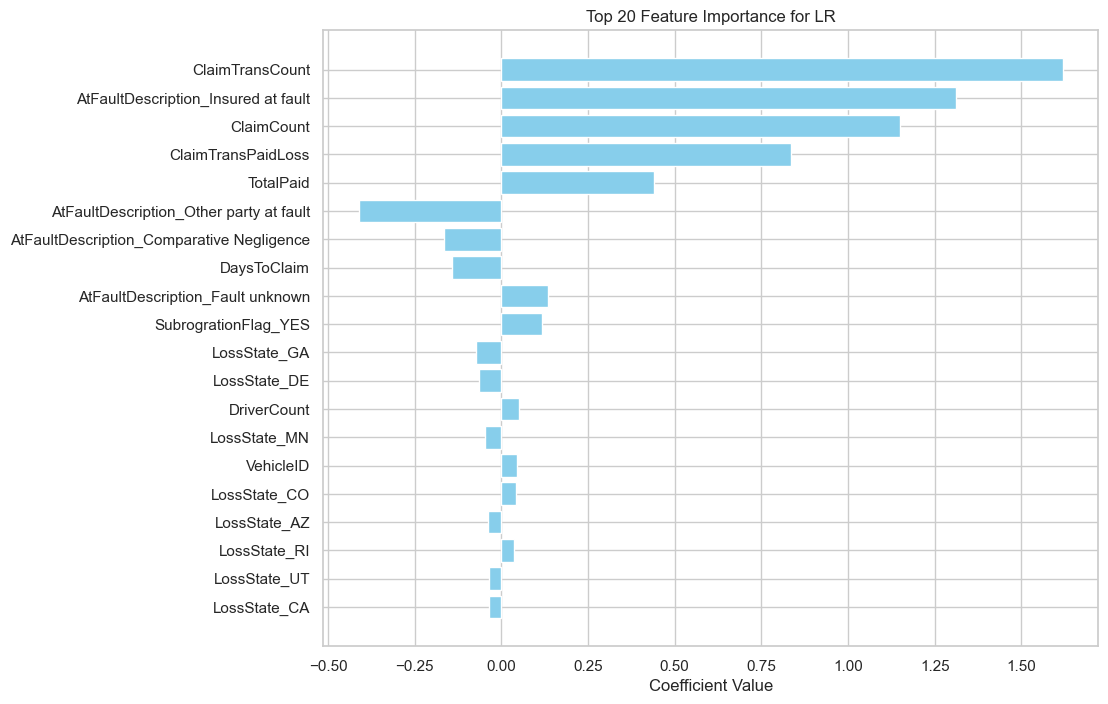

In [95]:
# Select the top 20 features
top_20 = lr_importance.head(20)

# Plotting the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_20['Feature'], top_20['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Importance for LR')
plt.gca().invert_yaxis()  # To display the highest coefficients at the top
plt.show()

* We can see that the top 5 most significant predictors for the Logistic Regression Model is ClaimTransCount, Insured at fault, claim count, Claim Trans paid Loss, and total paid

## Visualization
* Here I will visulaize the Confusion Matrix and the ROC curve

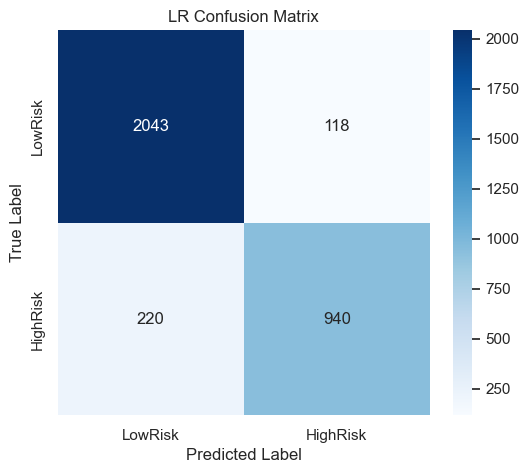

In [96]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LowRisk", "HighRisk"], yticklabels=["LowRisk", "HighRisk"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LR Confusion Matrix")
plt.show()

This cell will create an ROC curve

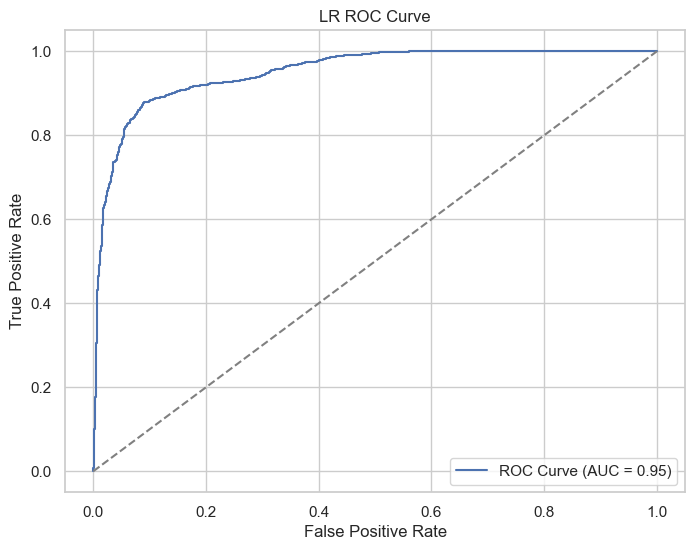

In [97]:
# Plot the ROC curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f"ROC Curve (AUC = {lr_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LR ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Decision Tree Model
* I will now create a decision tree model for my second classification model
* I will do this using grid search to find the best fit model

In [98]:
#set up the grid of parameters for decision tree model
grid={"criterion": ['gini', 'entropy'], #
      "max_depth" : [None, 2, 3, 4, 5, 6, 7, 8, 9],#
      "max_leaf_nodes" : [None,  8, 9, 10, 11, 12, 15, 20, 25, 30],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}
dt_model = DecisionTreeClassifier(random_state = 21)
dt_model_cv=GridSearchCV(dt_model, grid, cv=5)
dt_model_cv.fit(X_train, y_train)

#print best parameters
print("tuned hyperparameters :(best parameters) ", dt_model_cv.best_params_)
# print("accuracy :",dt_model_cv.best_score_)


tuned hyperparameters :(best parameters)  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None}


creating best fit decision tree model based on the parameters from grid search

In [99]:
best_dt = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = None, 
                               class_weight='balanced', criterion = 'gini', random_state = 21)
best_dt.fit(X_train, y_train)
best_dt_pred = best_dt.predict(X_test)
dt_pred_proba = best_dt.predict_proba(X_test)[:, 1]

print(best_dt_pred)

# model_pred = pd.DataFrame(model_dt_pred)
# model_pred = model_pred.rename(columns = {0:'Predict_BestTree'})


# display(model_pred.sample(5, random_state=244))

[1 0 1 ... 1 0 0]


## Reporting the Test Statistics
* This section will report the accuracy score, sensitivity, specificity and ROC AUC. Along with a classification report and a simple confusion matrix

In [100]:
#Evaluating the model and calculating the metrics
dt_accuracy = accuracy_score(y_test, best_dt_pred)
dt_conf_matrix = confusion_matrix(y_test, best_dt_pred)
dt_tn, dt_fp, dt_fn, dt_tp = dt_conf_matrix.ravel()
dt_sensitivity = dt_tp / (dt_tp + dt_fn)  # True Positive Rate (Recall)
dt_specificity = dt_tn / (dt_tn + dt_fp)  # True Negative Rate
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)

print(f"Accuracy: {dt_accuracy:.2f} \n")
print(f"Sensitivity (Recall): {dt_sensitivity:.2f} \n")
print(f"Specificity: {dt_specificity:.2f} \n")
print(f"ROC AUC: {dt_roc_auc:.2f} \n")

print("Confusion Matrix:")
print(dt_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, best_dt_pred))

Accuracy: 0.93 

Sensitivity (Recall): 1.00 

Specificity: 0.89 

ROC AUC: 0.98 

Confusion Matrix:
[[1917  244]
 [   3 1157]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2161
           1       0.83      1.00      0.90      1160

    accuracy                           0.93      3321
   macro avg       0.91      0.94      0.92      3321
weighted avg       0.94      0.93      0.93      3321



## Analyzing Test Statistics
* I will assess the models accuracy, sensitivity and specificity

#### Accuracy
* 0.93
    * Accuracy measures th eproportion of correctly classified instances out of all instances. It helps tp provide an overall measure of how well the model performs on an entire dataset
* In relation to the decision tree model, an accuracy of 0.93 indicates that the decision tree model correctly classifies 93% of all cases.  This is a strong result and suggest that the model is performing very well overall

#### Sensitivity
* 1.00
    * Sensitivity measures the proportion of actual positive instances that the model correctly identifies as positive.
* In relation to this model, a sensitivity of 1.00 means the decision tree correctly identifies 100% of the positove cases.  This is perfect sensitivity score, indicating that there are no false negatives. This is crucial in scenarios where missing a positive case could have severe consequences.

#### Specificity
* 0.89
    * Specificity measures the proportion of actual negative instances that the model correctly identifies as negative
* A specificity of 0.89 indicates that the decision tree correctly identifies 89% of negative cases. However it also means that 11% of the negative vasesare incorrectly classified as positive. This is lower than the model sensitivity whihc shows that the model prioritizes capturing positives over minimizing false positives.

## Decision Tree Visualization
* I will now visualize the decision tree.  Because I used gridsearch immediately instead of doing a base decision tree then doing grid search, this visualization will be the pruned tree because I am only displaying the best fit model through gridsearch for each model.
* This will also help us determine the significant predictors for the decision tree

Pruned Decision Tree: 


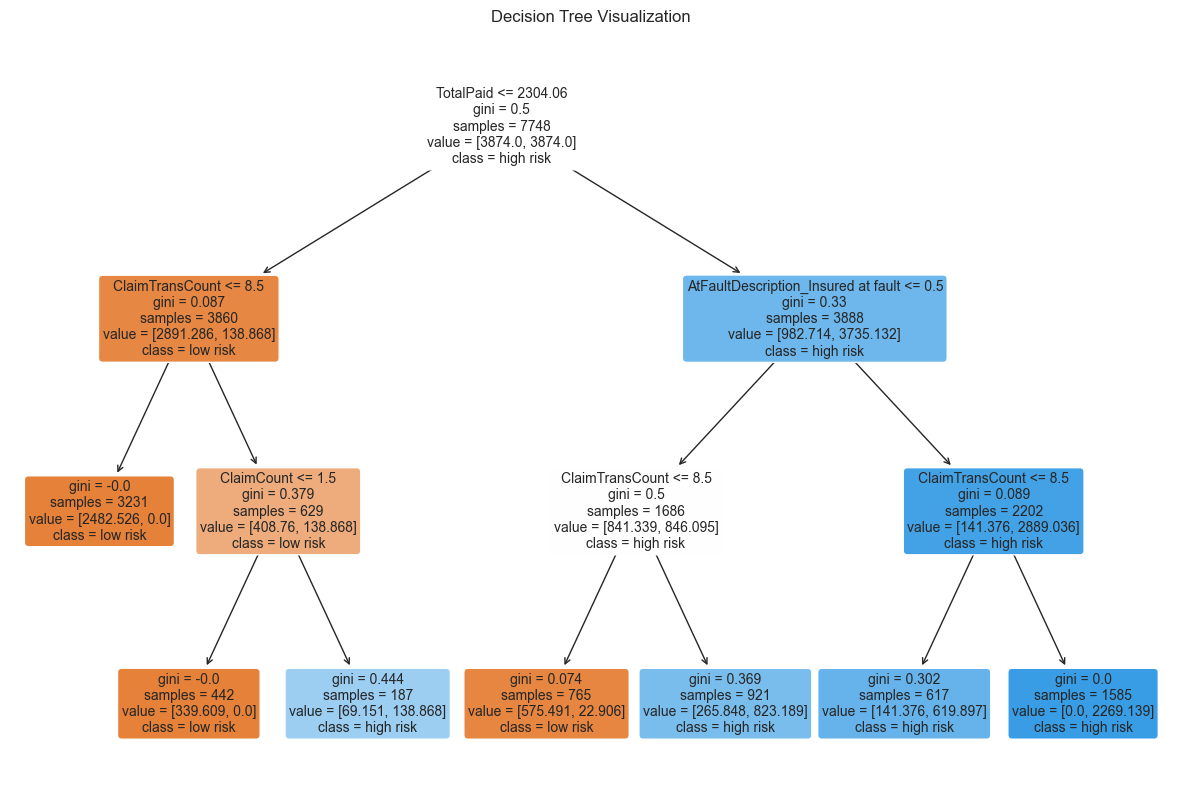

In [101]:
print("Pruned Decision Tree: ")
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plot_tree(
    best_dt, 
    feature_names=list(X_train.columns),  # Convert Index to list
    class_names=['low risk', 'high risk'],  # Replace with your actual class labels
    filled=True,  # Color the nodes based on the class
    rounded=True,  # Make the boxes rounded
    fontsize=10  # Adjust font size for readability
)
plt.title("Decision Tree Visualization")
plt.show()


* We can see that the 4 significant predictors for the decision tree model were TotalPaid, ClamTransCount, Insured at fault, and Claim count

## Visualization
* Here I will visualize the Confusion Matrix and the ROC curve

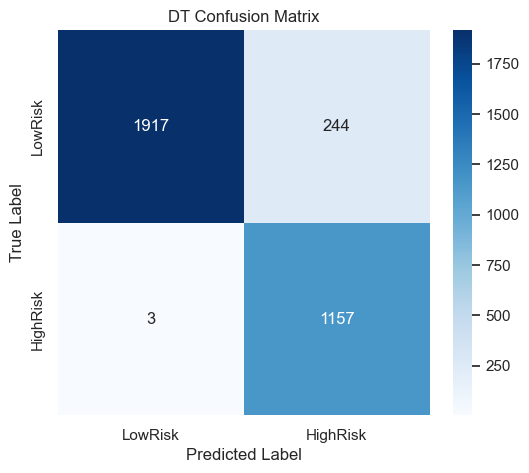

In [102]:
#plotting confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LowRisk", "HighRisk"], yticklabels=["LowRisk", "HighRisk"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DT Confusion Matrix")
plt.show()

This cell will create an ROC Curve

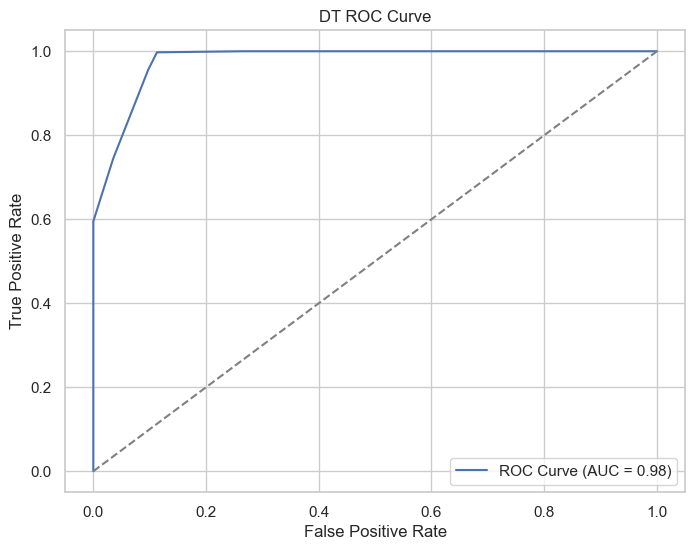

In [103]:
# Plot the ROC curve
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f"ROC Curve (AUC = {dt_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Random Forest Model
* I will now create a random forest model for my third classification model
* I will do this using grid search to find the best fit model

In [ ]:
#set up param grid
param_grid_rf = [
    {"criterion": ['gini', 'entropy'], #default is gini
     "max_features":['sqrt', 'log2'], #default is sqrt
    "n_estimators":[100, 500, 1000, 1500], #default is 100
     "max_depth" :[ None, 2, 3, 4, 5, 6, 7], #default is None
     "min_samples_leaf":[1, 5, 8, 12, 14, 16, 18, 20] #default is 1
    }
]

#make rf model
rf_model = RandomForestClassifier(random_state=21)

#set up grid search
rf_model_cv = GridSearchCV(rf_model, param_grid_rf, cv = 3, n_jobs=-1)

rf_model_cv.fit(X_train, y_train)

#print best parameters
print("tuned hyperparameters :(best parameters) ", rf_model_cv.best_params_)


fit model with best params

In [ ]:
#best fit model will be called model_rf
best_rf = RandomForestClassifier(max_depth = 3, max_features='sqrt', min_samples_leaf=1, 
                                criterion = 'entropy', n_estimators = 1000, random_state = 21)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
rf_pred_proba = best_rf.predict_proba(X_test)[:, 1]

print(best_rf_pred)

## Reporting the Test Statistics
* This section will report the accuracy score, sensitivity, specificity and ROC AUC. Along with a classification report and a simple confusion matrix

In [ ]:
#Evaluating the model and calculating the metrics
rf_accuracy = accuracy_score(y_test, best_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, best_rf_pred)
rf_tn, rf_fp, rf_fn, rf_tp = rf_conf_matrix.ravel()
rf_sensitivity = rf_tp / (rf_tp + rf_fn)  # True Positive Rate (Recall)
rf_specificity = rf_tn / (rf_tn + rf_fp)  # True Negative Rate
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"Accuracy: {rf_accuracy:.2f} \n")
print(f"Sensitivity (Recall): {rf_sensitivity:.2f} \n")
print(f"Specificity: {rf_specificity:.2f} \n")
print(f"ROC AUC: {rf_roc_auc:.2f} \n")

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, best_rf_pred))

## Analyzing Test Statistics
* I will assess the models accuracy, sensitivity and specificity

#### Accuracy
* 0.93
    * Accuracy measures the overall correctness of the model, calculated as the ratio of correctly classified instances to the total number of instances
* In this case an accuracy of 0.93 means that the model correctly identifies 93% of the data. This is a very high and speaks to the model's ability to predict the data

#### Sensitivity
* 0.82
    * Sensitivity measures the model's ability to correctly identify positive instances (high risk customers). It focuses on the proportion of true positives out of all positives
* In this case a sensitivity of 0.82 means that the model correctly identifies 82% of all actual positive cases.  This is particulary important in scnenarios where missing a positive case is costly, such as flagging hogh-risk customers for an insurance company

#### Specificity
* 0.99
    * Specificity measures the model's ability to correctly identify negative instances. It focuses on the proportion of true negatives out of all actual negatives.
* In the case of this random forest model, a specificity of 0.99 means that the model correctly identified 99% of all actual negative cases. This indicates that the model is very good at recognizing low-risk customers. In turn, this would minimize false positives (low risk customers being flagged as high risk.

## Significant Features
* I will now assess important features by finding significant predictors, then printinb them in descending order

In [ ]:
#this will show me my important features
feat_imp = pd.DataFrame(best_rf.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

create visualization

In [ ]:
# Create a DataFrame for feature importances
rf_importance = pd.DataFrame({'Importance': best_rf.feature_importances_}, index=X.columns)

# Sort the feature importances in descending order to get the top features
rf_importance = rf_importance.sort_values('Importance', axis=0, ascending=False)

# Select the top 20 most important features
rf_top_20_importance = rf_importance.head(20)

# Set the figure size to make the plot taller, improving readability
plt.figure(figsize=(10, 15))  # Width=10, Height=15 for a tall plot

# Plot the feature importances as a horizontal bar chart
rf_top_20_importance.plot(kind='barh', color='b', linewidth=1)

# Set the x-label for the plot
plt.xlabel('Variable Importance')

# Remove the legend as it's unnecessary for this plot
plt.gca().legend_ = None

# Set the title for the plot
plt.title('Top 20 Important Features for RF')

# Display the plot
plt.show()

* We can see that the top 5 most important features for the Random Forest model in order are: TotalPaid, ClaimTransCount, ClaimTransPaidLoss, Insured at fault, and Claim count

## Visualization
* Here I will visualize the Confusion Matrix and the ROC curve

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LowRisk", "HighRisk"], yticklabels=["LowRisk", "HighRisk"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF Confusion Matrix")
plt.show()

In [ ]:
# Plot the ROC curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"ROC Curve (AUC = {rf_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Comparison of Models
* here I will make a comparison ROC graph, decision matrix, and a bar chart comparing the accuracy, sensitivity, & specivity

In [ ]:
# Create the composite ROC curves
plt.figure(figsize = (10,9))
plt.suptitle('ROC Curves - Competing Classification Methodologies', fontweight='bold', fontsize=18, y=.92)

plt.plot(dt_fpr, dt_tpr, color='green',
         label='Decision Tree Best(AUC = {:.3f})'.format(dt_roc_auc))
plt.plot(rf_fpr, rf_tpr, color='purple', 
         label='Random Forest Best (AUC = {:.3f})'.format(rf_roc_auc))
plt.plot(lr_fpr, lr_tpr,color='red', 
         label='Logistic Regression Best (AUC = {:.3f})'.format(lr_roc_auc))

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate (aka 1 - Specificity)', fontsize=12) 
plt.ylabel('True Positive Rate (aka Recall, Sensitivity)', fontsize=12)  
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.show()

this code will show all decision matrix

In [ ]:
plt.figure(figsize=(20,16))


plt.subplot(221)
plt.title('Best Decision Tree Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
dt_chart = sns.heatmap(dt_conf_matrix, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
dt_chart.set_xlabel('Predicted', fontsize=15)
dt_chart.set_ylabel('True', fontsize=15)
dt_chart.xaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12)
dt_chart.yaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12, va='center')


plt.subplot(223)
plt.title('Best Random Forest Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
rf_chart = sns.heatmap(rf_conf_matrix, annot=True, cmap="gist_gray", annot_kws={"size": 16}, fmt="g")
rf_chart.set_xlabel('Predicted', fontsize=15)
rf_chart.set_ylabel('True', fontsize=15)
rf_chart.xaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12)
rf_chart.yaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12, va='center')


plt.subplot(224)
plt.title('Best Logistic Regression Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
lr_chart = sns.heatmap(lr_conf_matrix, annot=True, cmap="Reds", annot_kws={"size": 16}, fmt="g")
lr_chart.set_xlabel('Predicted', fontsize=15)
lr_chart.set_ylabel('True', fontsize=15)
lr_chart.xaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12)
lr_chart.yaxis.set_ticklabels(['LowRisk', 'HighRisk'], fontsize=12, va='center')
plt.show()

say which one is better and why
* dec tree bc better acc and we're focused on predicting high risk not low risk so sensitivity is more important than specivity

## Most Important Variables Across Models
1. TotalPaid:
    * This variable consistently appears as one of the most important predictors in the Random Forest, Decision Tree and Logistic Regression models. This variable captures the financial impact of claims and reflects how much has been paid out for a customer's claims.  Customers with high TotalPaid amounts are more likely categorized as high-risk.    
    
2. ClaimTransCount:
    * Another strong predictor across all three models, this variable represents the number of transactions associated with claims. A higher count could indicate a pattern of frequent claim-related activities, correlating with higher risk.  
    
3. Insured at Fault:
    * The variable 'AtFaultDescription_Insured at fault' appears consistently as a significant predictor in all models. This factor likely emphasizes behavioral patterns or responsibility in claims, with customers frequently at fault being more prone to high-risk classification.
    
* **Supporting Variables**
    * Claim Count: This was found as an important predictor in all models, particularly in the Decision Tree and Logistic Regression. This variable reflects the total number of claims filed, which is often an indicator of customer risk level.
    * ClaimTransPaidLoss: While not as consistently ranked as the top feature, this variable holds importance in the Random Forest and Logistic Regression models, emphasizing the loss amounts per transaction.
    
    
- **Conclusion**
    - The overall top features: **TotalPaid, ClaimTransCount, and Insured at Fault**, demonstrate that both financial impact and behaviorial patterns are critical in assessing whether a customer is high risk. The inclusion of these variables in all three models highlight their reliability and effectiveness in predictive analytics for risk assessment.










## Summary
* To identify high-risk customers, I employeed three classification models: Decision Tree, Logistic Regression, and Random Forest. These models were evaluated based on key performance metrics including accuracy, sensitivity, specificity, the confusion matrix, and the ROC curve. By analyzing these metrics, I was able to determine the most suitable model for predicting whether a customer is high risk (1) or not(0).

- **Evaluation Metrics Overview**
    1. **Accuracy**: Measures the overall correctness of the model in classifying both high-risk and low-risk customers. It is the ratio of correctly classified instances (both positive and negative) to the total number of instances.
        * Decision Tree: 0.93
        * Random Forest: 0.93
        * Logistic Regression: 0.90
        
    2. **Sensitivity**: Indicates the model's ability to correctly identify high-risk customers (true positives). This metric is particularly important as the goal is to prioritize identifying high-risk customers over low-risk ones.
        * Decision Tree: 1.00
        * Random Forest: 0.82
        * Logistic Regression: 0.81

    3. **Specificity**: Measures the model's ability to correctly classify low-risk customers (true negatives). While specificity is important to reduce false positives, it is less critical in this scenario compared to sensitivity.
        * Decision Tree: 0.89
        * Random Forest: 0.99
        * Logistic Regression: 0.95
        
        
* **Model Selection**
    * After careful consideration, I determined that the **Decision Tree model** was the best fit model for predicting high-risk customers. This conclusion was based on the following observations
        * The Decision Tree achieved the **same accuracy (93%)** as the Random Forest model, which indicates that both models are highly effective overall.
        * It demonstrated **higher sensitivity (100%)** compared to the Random Forest (82%) and Logistic Regression (81%). This is crucial because the objective is to accurately identify high-risk customers (1), in otherwords, minimizing false negatives.
        * While the Decision Tree's specificity (89%) was lower than the Random Forest's (99%), it still performed very well in identifying low-risk customers. This slight trade-off in specificity is acceptable given the priority on evaluating high-risk customers.
        
- **Insights and Conclusions**
    - The Decision Tree model's ability to balance high sensitivity with strong specificity makes it the most effective model for the task. It ensures the majority of high-risk customers are identified while maintaining low misclassification rates for low-risk customers
    - The Random FOrest model, although comparable in accuracy, was less sensitive to high-risk customers, making it less suited for this specific case. However, if the goal was to identify low-risk customers, this would be the ideal model.
    - Logistic Regression, while similar and faster to train, lagged behind in both accuracy and sensitivity, indicating it was not capable of capturing the complexities of the dataset.  
    
In conclusion, this analysis underscores the importance of prioritizing sensitivity in scenarios where identifying high-risk individuals is critical. The Decision Tree model's performance highlights its strength in achieving this goal, making it the optimal choize for predicting high-risk customers.
    
    


        